### Prompt: 

Netflix wants to identify similar movies based on movie characteristics.

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

### Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

### This will ultimately include the following deliverables:

A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint). <br>
A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.


## Check out the presentation on these clusters here:

https://docs.google.com/presentation/d/1384KCPEwcTNblrPhp1awDoKwCdqC2pNxqs2HRjPdAcU/edit?usp=sharing

### Let's start by importing our data, doing some data exploration and cleaning if it's required and getting it ready for some clustering! 

In [1]:
import numpy as np
import pandas as pd
import scipy
import itertools
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

from ast import literal_eval
import os
import pandas as pd

In [2]:


df_movies = pd.read_csv('/Users/ir3n3br4t515/Desktop/movies_metadata.csv')
df_ratings = pd.read_csv('/Users/ir3n3br4t515/Desktop/ratings.csv')
df_links = pd.read_csv('/Users/ir3n3br4t515/Desktop/links.csv')


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_movies.head(10)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


### The dataset has the following features:

budget - The budget in which the movie was made.<br>
genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
homepage - A link to the homepage of the movie.<br>
id - This is infact the movie_id as in the first dataset.<br>
keywords - The keywords or tags related to the movie.<br>
original_language - The language in which the movie was made.<br>
original_title - The title of the movie before translation or adaptation.<br>
overview - A brief description of the movie.<br>
popularity - A numeric quantity specifying the movie popularity.<br>
production_companies - The production house of the movie.<br>
production_countries - The country in which it was produced.<br>
release_date - The date on which it was released.<br>
revenue - The worldwide revenue generated by the movie.<br>
runtime - The running time of the movie in minutes.<br>
status - "Released" or "Rumored".<br>
tagline - Movie's tagline.<br>
title - Title of the movie.<br>
vote_average - average ratings the movie recieved.<br>
vote_count - the count of votes recieved.<br>

### For clustering, we will be focusing on the int columns of:

Budget<br>
id (Movie Id)<br>
Release Date (year)<br>
Revenue<br>
Runtime<br>
vote_average<br>
vote_count<br>
Title - Though this is not a numerical value, we will be using the Title later to do some sample checking on our data to make sure the clusters intuitively make sense! 



### Cleaning 

Below we will get a sense of how our int categories look so that we can later use them for clustering. 


Our budget, id and release date columns need to be transfered to integers.<br> 


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [5]:
df_movies.revenue = pd.to_numeric(df_movies.revenue, errors= 'coerce')
df_movies.id = pd.to_numeric(df_movies.id, errors= 'coerce')
df_movies.budget = pd.to_numeric(df_movies.budget, errors= 'coerce')


In [6]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors = 'coerce').dt.year


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45463 non-null float64
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45463 non-null float64
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null float64
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null ob

### Checking again to make sure we have integers in all categories modeled in the K means clustering algorithm. Everything looks good! And once again, we have our integer columns of:
<br><br>

Budget<br>
id (Movie Id)<br>
Release Date (year)<br>
Revenue<br>
Runtime<br>
vote_average<br>
vote_count<br>

### Ok. Now let's move onto Genres. 

In [8]:
list (df_movies.genres)

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

### Let's start by breaking up these long lists of genres into binary columns for each Genre


In [9]:
# run the following two lines only once
df_movies["genres"] = df_movies.genres.apply(lambda x: literal_eval(x))
df_movies["genres"] = df_movies.genres.apply(lambda x: [el["name"] for el in x])

In [10]:
unique_genres = set()
for col in df_movies.genres:
    for genr in col:
        unique_genres.add(genr)

print(unique_genres)

{'Comedy', 'The Cartel', 'Action', 'Vision View Entertainment', 'Crime', 'Animation', 'GoHands', 'Western', 'Horror', 'Carousel Productions', 'History', 'Pulser Productions', 'Odyssey Media', 'Rogue State', 'War', 'Thriller', 'Telescene Film Group Productions', 'Mardock Scramble Production Committee', 'Family', 'Foreign', 'Science Fiction', 'TV Movie', 'Aniplex', 'Romance', 'Fantasy', 'BROSTA TV', 'Drama', 'Documentary', 'Music', 'Sentai Filmworks', 'Mystery', 'Adventure'}


In [11]:
df_movies = df_movies.append(pd.DataFrame(columns = unique_genres))
df_movies[list(unique_genres)] = 0

for i, row in df_movies.iterrows():
    df_movies.loc[i, df_movies.iloc[i,:]["genres"]] = 1

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [12]:
df_movies.head()

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,0,1,0,0,0,1,0,0,0,...,1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,0,1,0,0,0,0,0,0,0,0,...,1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,0,0,0,0,0,0,1,0,0,0,...,1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,0,0,0,0,0,0,1,0,0,1,...,1995.0,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,0,0,0,0,0,0,1,0,0,0,...,1995.0,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Our genres are binarized, which is great. Now the nulls. We're just going to remove them since they make up such a small percentage of our dataset (less than 1%)

In [13]:
df_movies.isnull().sum()


Action                                       0
Adventure                                    0
Animation                                    0
Aniplex                                      0
BROSTA TV                                    0
Carousel Productions                         0
Comedy                                       0
Crime                                        0
Documentary                                  0
Drama                                        0
Family                                       0
Fantasy                                      0
Foreign                                      0
GoHands                                      0
History                                      0
Horror                                       0
Mardock Scramble Production Committee        0
Music                                        0
Mystery                                      0
Odyssey Media                                0
Pulser Productions                           0
Rogue State  

In [14]:
df_movies_ = df_movies[['id', 'budget', 'vote_average', 'vote_count', 'revenue', 'runtime', 'release_date']].dropna()

In [15]:
df_movies_.isnull().sum()


id              0
budget          0
vote_average    0
vote_count      0
revenue         0
runtime         0
release_date    0
dtype: int64

### We don't have any missing values!

### We also want to make sure we reset our index because our id column had some nulls. 

In [16]:
df_movies.reset_index(drop = True, inplace = True)

In [17]:
df_movies.head()

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,0,1,0,0,0,1,0,0,0,...,1995.0,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,0,1,0,0,0,0,0,0,0,0,...,1995.0,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,0,0,0,0,0,0,1,0,0,0,...,1995.0,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,0,0,0,0,0,0,1,0,0,1,...,1995.0,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,0,0,0,0,0,0,1,0,0,0,...,1995.0,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Let's now get a sense of our data by visualizing it and understanding where our unique values reside so that we know where the bulk of it is coming from.

In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 56 columns):
Action                                   45466 non-null int64
Adventure                                45466 non-null int64
Animation                                45466 non-null int64
Aniplex                                  45466 non-null int64
BROSTA TV                                45466 non-null int64
Carousel Productions                     45466 non-null int64
Comedy                                   45466 non-null int64
Crime                                    45466 non-null int64
Documentary                              45466 non-null int64
Drama                                    45466 non-null int64
Family                                   45466 non-null int64
Fantasy                                  45466 non-null int64
Foreign                                  45466 non-null int64
GoHands                                  45466 non-null int64
History                

In [19]:
df_movies.dtypes

Action                                     int64
Adventure                                  int64
Animation                                  int64
Aniplex                                    int64
BROSTA TV                                  int64
Carousel Productions                       int64
Comedy                                     int64
Crime                                      int64
Documentary                                int64
Drama                                      int64
Family                                     int64
Fantasy                                    int64
Foreign                                    int64
GoHands                                    int64
History                                    int64
Horror                                     int64
Mardock Scramble Production Committee      int64
Music                                      int64
Mystery                                    int64
Odyssey Media                              int64
Pulser Productions  

In [20]:
num_movies = len(df_movies.id.unique())
print('There are {} unique movies in this data set'.format( num_movies))


There are 45434 unique movies in this data set


In [21]:
for col in df_movies.columns: 
    print(col) 

Action
Adventure
Animation
Aniplex
BROSTA TV
Carousel Productions
Comedy
Crime
Documentary
Drama
Family
Fantasy
Foreign
GoHands
History
Horror
Mardock Scramble Production Committee
Music
Mystery
Odyssey Media
Pulser Productions
Rogue State
Romance
Science Fiction
Sentai Filmworks
TV Movie
Telescene Film Group Productions
The Cartel
Thriller
Vision View Entertainment
War
Western
adult
belongs_to_collection
budget
genres
homepage
id
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count


In [22]:
df_combined = df_movies.merge(df_movies_, left_on='id', right_on='id')

In [23]:
df_combined.head()

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,title,video,vote_average_x,vote_count_x,budget_y,vote_average_y,vote_count_y,revenue_y,runtime_y,release_date_y
0,0,0,1,0,0,0,1,0,0,0,...,Toy Story,False,7.7,5415.0,30000000.0,7.7,5415.0,373554033.0,81.0,1995.0
1,0,1,0,0,0,0,0,0,0,0,...,Jumanji,False,6.9,2413.0,65000000.0,6.9,2413.0,262797249.0,104.0,1995.0
2,0,0,0,0,0,0,1,0,0,0,...,Grumpier Old Men,False,6.5,92.0,0.0,6.5,92.0,0.0,101.0,1995.0
3,0,0,0,0,0,0,1,0,0,1,...,Waiting to Exhale,False,6.1,34.0,16000000.0,6.1,34.0,81452156.0,127.0,1995.0
4,0,0,0,0,0,0,1,0,0,0,...,Father of the Bride Part II,False,5.7,173.0,0.0,5.7,173.0,76578911.0,106.0,1995.0


In [24]:
df_combined.isnull().sum()


Action            0
Adventure         0
Animation         0
Aniplex           0
BROSTA TV         0
                 ..
vote_average_y    0
vote_count_y      0
revenue_y         0
runtime_y         0
release_date_y    0
Length: 62, dtype: int64

In [25]:
df_combined[['budget_y', 'vote_average_y', 'vote_count_y', 'revenue_y', 'runtime_y', 'release_date_y']].corr()

,budget_y,vote_average_y,vote_count_y,revenue_y,runtime_y,release_date_y
budget_y,1.000000,0.072607,0.676409,0.768621,0.134803,0.132249
vote_average_y,0.072607,1.000000,0.123643,0.083681,0.156648,0.027976
vote_count_y,0.676409,0.123643,1.000000,0.811958,0.113479,0.107219
revenue_y,0.768621,0.083681,0.811958,1.000000,0.103875,0.088711
runtime_y,0.134803,0.156648,0.113479,0.103875,1.000000,0.079048
release_date_y,0.132249,0.027976,0.107219,0.088711,0.079048,1.000000


### OK! Our nulls are accounted for, our genres are binarized and the features we are going to use are numbers!  Data cleaning part is over. 

### Now we are ready to start clustering and finally getting to the "Unsupervised" part of this capstone. 

### Let's create our X parameters first. 



In [26]:
X2 = df_combined[['budget_y',
'release_date_y',
'revenue_y',
'runtime_y',
'vote_average_y',
'vote_count_y',]]


## Now we are ready to start looking at a few different clustering algorithms! 

### We will start with K means and then move on to Mean Shift, HDB Scan, DB Scan, Gaussian Mixture Model GMM and finish off with Fuzzy C Means so that we have a nice mix of heirarchical and fuzzy algorithms to see how they compare. We will also be seeing a silhouette score for each model so that we have some quantitative measure for each of these models. 

## K Means:

In [27]:

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler(X2)

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=7)

### How many clusters is best for us? According to our Elbow Visualizer: 7


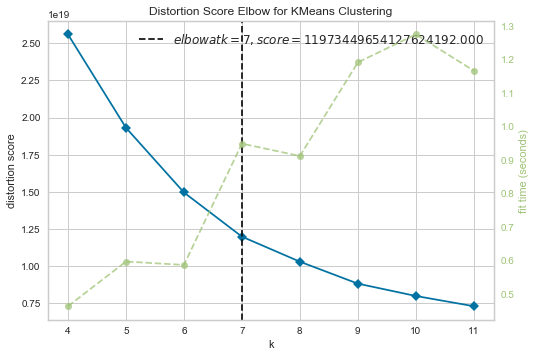

In [28]:


from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Creating our K Means clustering model below:

In [29]:
# Import KMeans
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)

# Fit model to points
model.fit(X2)

# Determine the cluster labels of new_points: labels
labels = model.predict(X2)

# Print cluster labels of new_points
print(labels)

[6 2 0 ... 0 0 0]


In [30]:
df_combined['Label'] = labels 
print (df_combined['Label'])

0        6
1        2
2        0
3        3
4        3
        ..
45187    0
45188    0
45189    0
45190    0
45191    0
Name: Label, Length: 45192, dtype: int32


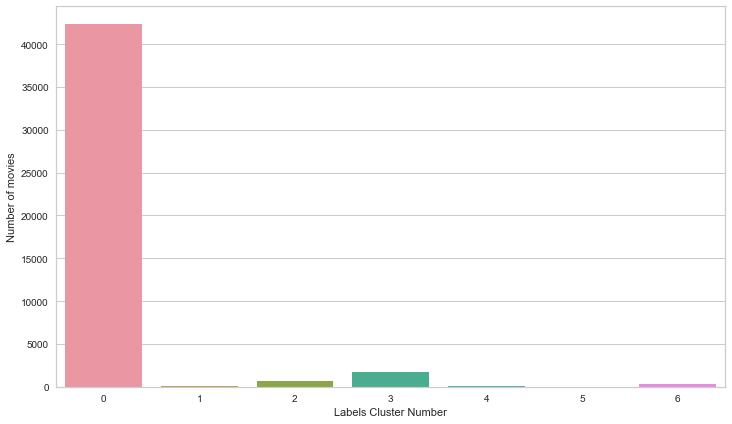

In [31]:


plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0,7,1),y=df_combined.groupby(['Label']).count()['budget_y'].values)
x=axis.set_xlabel("Labels Cluster Number")
x=axis.set_ylabel("Number of movies")

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X2, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.910086382984001


## Mean Shift:

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X2, quantile=0.2, n_samples=40000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X2)

# Extract cluster assignments for each data point.
meanshift_labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(meanshift_labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 260


In [34]:
df_combined['meanshift_labels'] = meanshift_labels 
print (df_combined['meanshift_labels'])

0        68
1        40
2         0
3         2
4         3
         ..
45187     0
45188     0
45189     0
45190     0
45191     0
Name: meanshift_labels, Length: 45192, dtype: int64


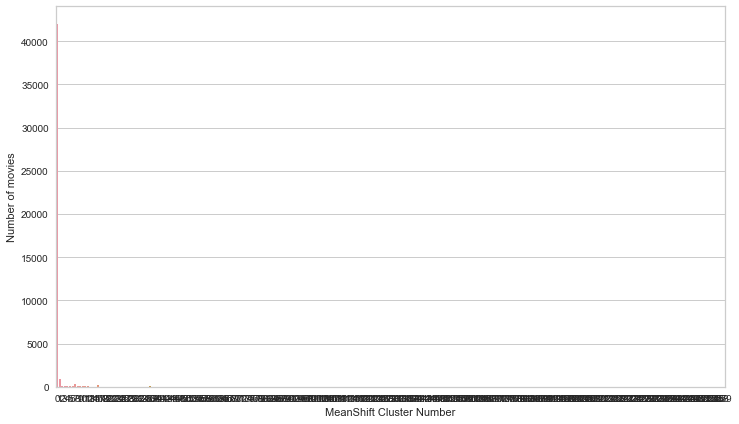

In [35]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0, 260, 1),y=df_combined.groupby(['meanshift_labels']).count()['budget_y'].values)
x=axis.set_xlabel("MeanShift Cluster Number")
x=axis.set_ylabel("Number of movies")

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X2, meanshift_labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.8874401202338844


## HDB Scan:

In [37]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
hdbscan_labels = clusterer.fit_predict(X2)


# Print cluster labels of new_points
print(hdbscan_labels)


[ -1  -1  -1 ... 240  -1 240]


In [38]:
n_clusters_ = len(np.unique(hdbscan_labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 242


In [39]:
df_combined['hdbscan_labels'] = hdbscan_labels 
print (df_combined['hdbscan_labels'])

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45187    240
45188    202
45189    240
45190     -1
45191    240
Name: hdbscan_labels, Length: 45192, dtype: int64


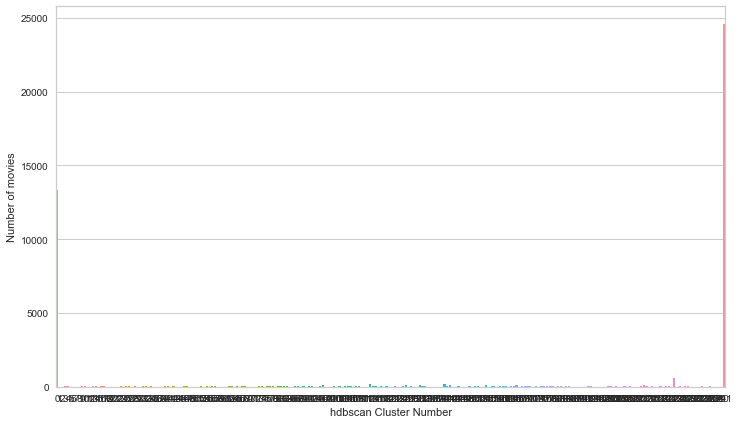

In [40]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0, 242, 1),y=df_combined.groupby(['hdbscan_labels']).count()['budget_y'].values)
x=axis.set_xlabel("hdbscan Cluster Number")
x=axis.set_ylabel("Number of movies")

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X2, hdbscan_labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.16655089690161035


## DB Scan: 

In [42]:
from sklearn.cluster import DBSCAN
>>> import numpy as np


clustering = DBSCAN(eps=3, min_samples=2).fit(X2)

dbscan_labels = clustering.fit_predict(X2)

print(dbscan_labels)


[-1 -1  0 ...  1 -1  1]


In [43]:
df_combined['dbscan_labels'] = dbscan_labels 
print (df_combined['dbscan_labels'])

0          -1
1          -1
2           0
3          -1
4          -1
         ... 
45187       1
45188    1069
45189       1
45190      -1
45191       1
Name: dbscan_labels, Length: 45192, dtype: int64


In [44]:
n_clusters_ = len(np.unique(dbscan_labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1086


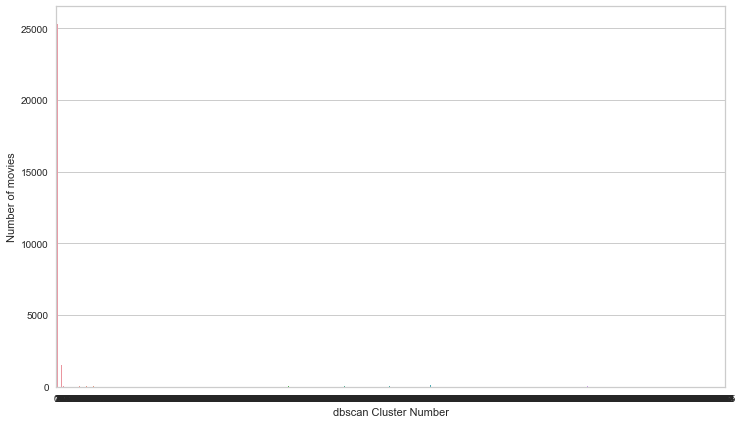

In [45]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0, 1086, 1),y=df_combined.groupby(['dbscan_labels']).count()['budget_y'].values)
x=axis.set_xlabel("dbscan Cluster Number")
x=axis.set_ylabel("Number of movies")

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X2, dbscan_labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.5758581620149806


## Gaussian Mixture Model GMM:

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(X2)
GMM_labels = gmm.predict(X2)
print(GMM_labels)

[3 3 0 ... 0 0 0]


In [48]:
df_combined['GMM_labels'] = GMM_labels

print (df_combined['GMM_labels'])

0        3
1        3
2        0
3        3
4        3
        ..
45187    0
45188    0
45189    0
45190    0
45191    0
Name: GMM_labels, Length: 45192, dtype: int64


In [49]:
n_clusters_ = len(np.unique(GMM_labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


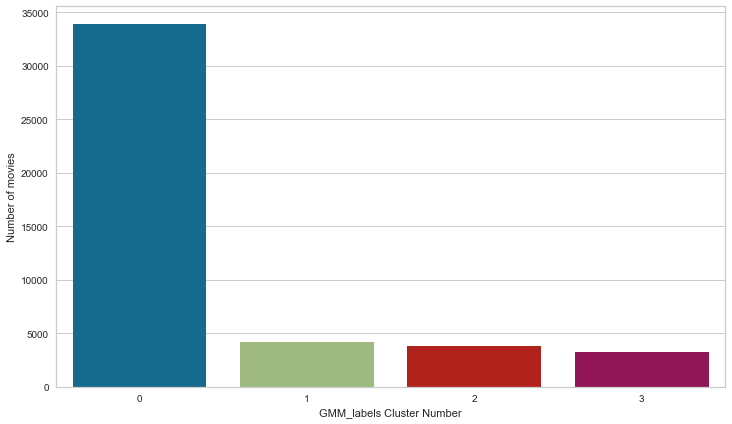

In [50]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0, 4, 1),y=df_combined.groupby(['GMM_labels']).count()['budget_y'].values)
x=axis.set_xlabel("GMM_labels Cluster Number")
x=axis.set_ylabel("Number of movies")

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X2, GMM_labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.6472860007408614


## Fuzzy C Means: 


In [52]:
from fcmeans import FCM

fcm = FCM(n_clusters=7)
fcm.fit(X2)
fcm_labels = fcm.predict(X2)
fcm_probabilities = fcm.u

print(fcm_labels)

[0 1 5 ... 5 5 5]


In [53]:
df_combined['fcm_labels'] = fcm_labels

print (df_combined['fcm_labels'])


0        0
1        1
2        5
3        4
4        3
        ..
45187    5
45188    5
45189    5
45190    5
45191    5
Name: fcm_labels, Length: 45192, dtype: int64


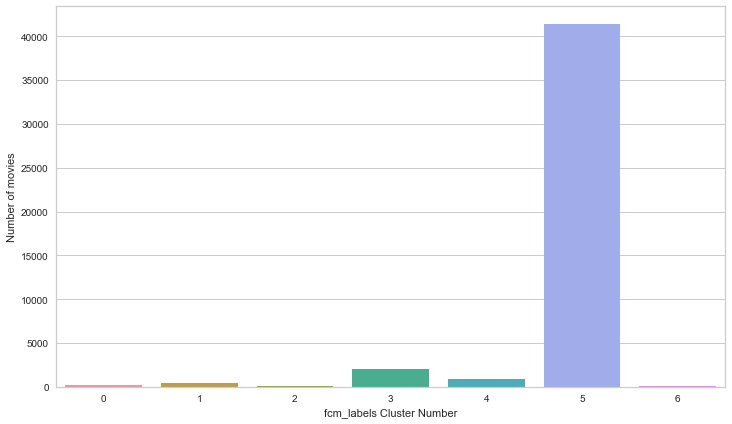

In [54]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0, 7, 1),y=df_combined.groupby(['fcm_labels']).count()['budget_y'].values)
x=axis.set_xlabel("fcm_labels Cluster Number")
x=axis.set_ylabel("Number of movies")

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(X2, fcm_labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.8937116619217329


### Our highest silhouette score came from K Means with a score of .91 which is quite high! The next performing clustering algorithm was fuzzy C means which gave us a score of .89 with a very similar distribution of movie titles in each cluster to what we saw with K means. K means just needs to do a distance calculation, whereas fuzzy c means needs to do a full inverse-distance weighting, so this model did more work, took longer, and almost gave us the same results as K means.

### Instead of using a distance-based model, GMM gives us a distribution-based model. GMM gave us a smaller number of clusters with one cluster group being much larger than the others which is interesting but with a silhouette score of .64 I don't see a compelling reason to choose this over K means.  

### Mean shift, HDB and DB Scan models had negative silhouette scores with way higher cluster numbers. This could be due to Hierarchical clustering not being able to handle big data well (unlike K Means clustering). These models could prove useful in the future if we wanted really fine granularity. Perhaps in the future, when we use these clusters for a recommendation system, we can deep dive into those 260+ clusters and try and find groupings or combine it with user level data but for the purposes of our Movie Lens data, this did not give us the kind of profiling we were looking for and the silhouette scores were way off. 


## Ok! We have selected a Model. We are going with K Means. 

### Let's redefine X2 with our labels included so that we can include it in our visualizations later and call that X3. We can also throw in our binarized genres as well. 




In [56]:
X3 = df_combined[['Label', 'budget_y',
'release_date_y',
'revenue_y',
'runtime_y',
'vote_average_y',
'vote_count_y', 
'Action', 
'Adventure', 
'Animation', 
'Comedy', 
'Documentary', 
'Crime',
'Drama',
'Family',
'Fantasy',
'Foreign',
'History',
'Horror',
'Music',
'Mystery',
'Romance',
'Science Fiction',
'Thriller',
'War',
'Western']]


### Since we have so many columns and variables we are using for our analysis, I will use TSNE to represents higher data in two dimensions to help us with our clustering. 

### Trying TSNE to get all the clusters onto a two dimensional view 

In [57]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X2)

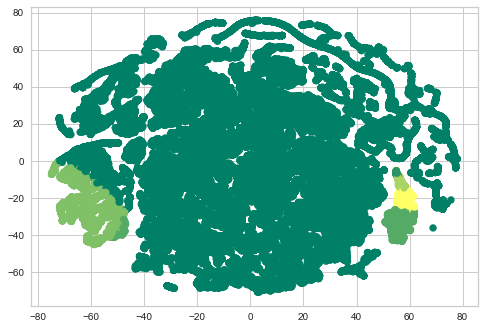

In [58]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = labels, cmap = 'summer')
plt.show()

###  As we can see, a lot of the movies in our list are part of cluster 0. My main hypothesis for this are that our data has a long tail, a multitude of movies that are lowly rated, low budget, low revenue films that exist out there in the ether. The vast variety of movies that fall into this category likely make up cluster 0, but let's deep dive into these a bit further. 

### We see that one cluster which is also the smallest, is the cluster of movies that received maximum number of votes(in terms of counts) and also have very high popularity and total runtime and net revenue. Let's see some of the movies that belong to these clusters.

In [59]:
size_array = list(df_combined.groupby(['Label']).count()['budget_y'].values)
size_array

[42308, 51, 678, 1745, 113, 3, 294]

In [60]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[0])].sample(3)


,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,vote_count_y,revenue_y,runtime_y,release_date_y,Label,meanshift_labels,hdbscan_labels,dbscan_labels,GMM_labels,fcm_labels
1640,0,0,0,0,0,0,0,0,0,1,...,7770.0,1.845034e+09,194.0,1997.0,5,198,-1,-1,3,6
26543,1,1,0,0,0,0,0,0,0,0,...,7993.0,2.068224e+09,136.0,2015.0,5,176,-1,-1,3,6
14601,1,1,0,0,0,0,0,0,0,0,...,12114.0,2.787965e+09,162.0,2009.0,5,177,-1,-1,3,6


In [61]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[1])].sample(5)


,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,vote_count_y,revenue_y,runtime_y,release_date_y,Label,meanshift_labels,hdbscan_labels,dbscan_labels,GMM_labels,fcm_labels
22074,0,1,0,0,0,0,0,0,0,0,...,4633.0,9.584000e+08,161.0,2013.0,1,101,-1,-1,3,6
17340,1,1,0,0,0,0,0,0,0,0,...,3351.0,1.123747e+09,154.0,2011.0,1,200,-1,-1,3,6
11036,1,1,0,0,0,0,0,0,0,0,...,5380.0,1.065660e+09,151.0,2006.0,1,102,-1,-1,3,6
14939,0,1,0,0,0,0,0,0,0,0,...,4773.0,1.025491e+09,108.0,2010.0,1,133,-1,-1,3,6
36150,0,1,1,0,0,0,1,0,0,0,...,4961.0,1.023784e+09,108.0,2016.0,1,213,-1,-1,3,6


In [62]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[-1])].sample(5)


,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,vote_count_y,revenue_y,runtime_y,release_date_y,Label,meanshift_labels,hdbscan_labels,dbscan_labels,GMM_labels,fcm_labels
11311,0,0,0,0,0,0,0,0,0,1,...,65.0,0.0,107.0,1989.0,0,0,-1,190,0,5
9803,1,0,0,0,0,0,0,0,0,0,...,18.0,0.0,87.0,1966.0,0,0,240,1,0,5
15987,0,0,0,0,0,0,0,0,0,0,...,3.0,0.0,78.0,2007.0,0,0,240,1,0,5
14459,1,0,0,0,0,0,1,0,0,0,...,3.0,0.0,83.0,2006.0,0,0,240,1,0,5
43976,0,1,0,0,0,0,0,0,0,0,...,7.0,0.0,101.0,1961.0,0,0,240,1,0,5


In [63]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[-2])].sample(5)


,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,vote_count_y,revenue_y,runtime_y,release_date_y,Label,meanshift_labels,hdbscan_labels,dbscan_labels,GMM_labels,fcm_labels
39508,0,0,0,0,0,0,0,1,0,1,...,1304.0,37589296.0,102.0,2016.0,3,1,38,-1,3,3
11710,0,0,0,0,0,0,0,0,0,1,...,325.0,37311672.0,120.0,2007.0,3,1,-1,-1,1,3
3746,0,0,0,0,0,0,1,1,0,0,...,556.0,86930411.0,85.0,1991.0,3,2,19,-1,3,4
23003,0,0,0,0,0,0,0,0,0,1,...,83.0,67800064.0,138.0,2014.0,3,1,-1,-1,3,3
6634,0,0,0,0,0,0,0,0,0,0,...,178.0,58878723.0,113.0,2003.0,3,1,-1,-1,3,3


In [64]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[2])].sample(5)


,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,vote_count_y,revenue_y,runtime_y,release_date_y,Label,meanshift_labels,hdbscan_labels,dbscan_labels,GMM_labels,fcm_labels
5225,1,0,0,0,0,0,0,0,0,0,...,5398.0,821708551.0,121.0,2002.0,4,108,-1,-1,3,2
5254,1,1,0,0,0,0,0,0,0,0,...,4074.0,649398328.0,142.0,2002.0,4,235,-1,-1,3,2
23193,1,1,0,0,0,0,0,0,0,0,...,4274.0,705717432.0,142.0,2014.0,4,187,-1,-1,3,2
23364,1,1,0,0,0,0,0,0,0,0,...,6155.0,747862775.0,131.0,2014.0,4,172,-1,-1,3,2
11993,0,0,1,0,0,0,1,0,0,0,...,2335.0,527068851.0,87.0,2007.0,4,97,-1,-1,3,0


In [65]:
Label_mask = (df_combined['Label'] == 1) #&(X['Drama'] == 1)&(X['Action'] == 1)

df_combined[Label_mask].sample(15)

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,vote_count_y,revenue_y,runtime_y,release_date_y,Label,meanshift_labels,hdbscan_labels,dbscan_labels,GMM_labels,fcm_labels
36150,0,1,1,0,0,0,1,0,0,0,...,4961.0,1.023784e+09,108.0,2016.0,1,213,-1,-1,3,6
18293,1,0,0,0,0,0,0,1,0,1,...,9263.0,1.084939e+09,165.0,2012.0,1,173,-1,-1,3,6
15393,0,0,1,0,0,0,1,0,0,0,...,4710.0,1.066970e+09,103.0,2010.0,1,102,-1,-1,3,6
12514,1,0,0,0,0,0,0,1,0,1,...,12269.0,1.004558e+09,152.0,2008.0,1,204,-1,-1,3,6
14939,0,1,0,0,0,0,0,0,0,0,...,4773.0,1.025491e+09,108.0,2010.0,1,133,-1,-1,3,6
22125,0,1,1,0,0,0,0,0,0,0,...,5440.0,1.274219e+09,102.0,2013.0,1,217,-1,-1,3,6
25083,1,1,0,0,0,0,0,0,0,0,...,8842.0,1.513529e+09,124.0,2015.0,1,215,-1,-1,3,6
17340,1,1,0,0,0,0,0,0,0,0,...,3351.0,1.123747e+09,154.0,2011.0,1,200,-1,-1,3,6
5830,1,1,0,0,0,0,0,0,0,0,...,7641.0,9.262874e+08,179.0,2002.0,1,244,-1,-1,3,2
43037,1,0,0,0,0,0,0,1,0,0,...,3803.0,1.238765e+09,136.0,2017.0,1,170,-1,-1,3,6


### Let's get a sense for how the Labels are showing up at a high level for us across our categories:

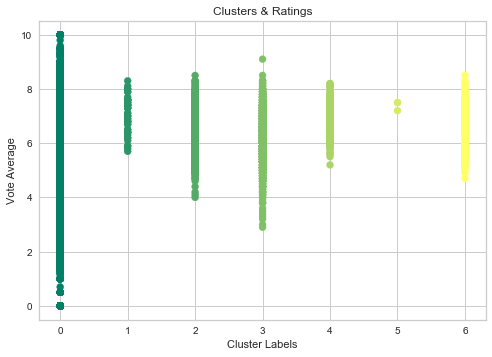

In [66]:
plt.scatter(X3['Label'], X3['vote_average_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Ratings")
plt.xlabel("Cluster Labels")
plt.ylabel("Vote Average")
plt.show()

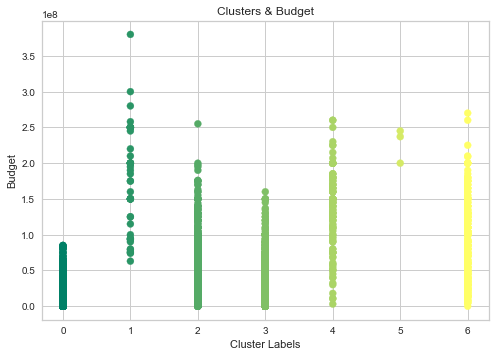

In [67]:
plt.scatter(X3['Label'], X3['budget_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Budget")
plt.xlabel("Cluster Labels")
plt.ylabel("Budget")
plt.show()

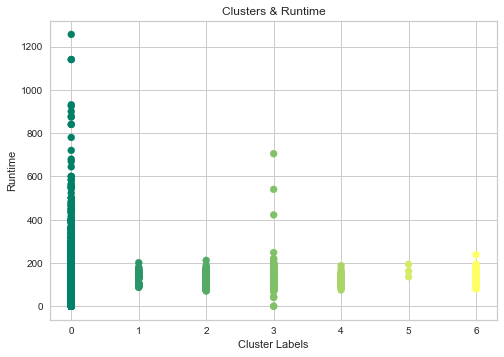

In [68]:
plt.scatter(X3['Label'], X3['runtime_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Runtime")
plt.xlabel("Cluster Labels")
plt.ylabel("Runtime")
plt.show()

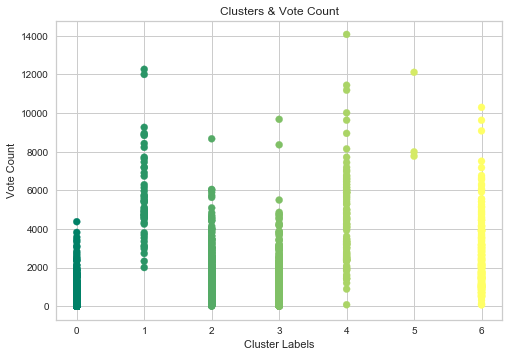

In [69]:
plt.scatter(X3['Label'], X3['vote_count_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Vote Count")
plt.xlabel("Cluster Labels")
plt.ylabel("Vote Count")
plt.show()

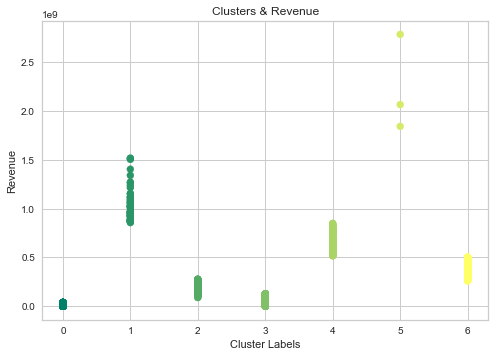

In [70]:
plt.scatter(X3['Label'], X3['revenue_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Revenue")
plt.xlabel("Cluster Labels")
plt.ylabel("Revenue")
plt.show()

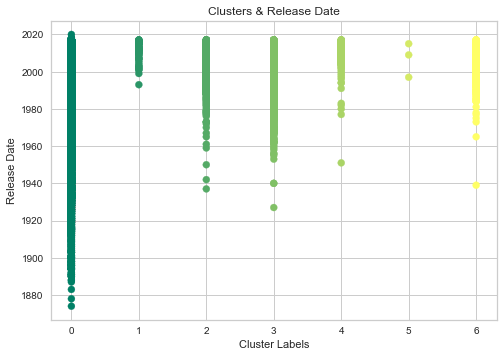

In [71]:
plt.scatter(X3['Label'], X3['release_date_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Release Date")
plt.xlabel("Cluster Labels")
plt.ylabel("Release Date")
plt.show()

### And now let's get to know our clusters individually.
<br>

### Starting below with our first cluster 0 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


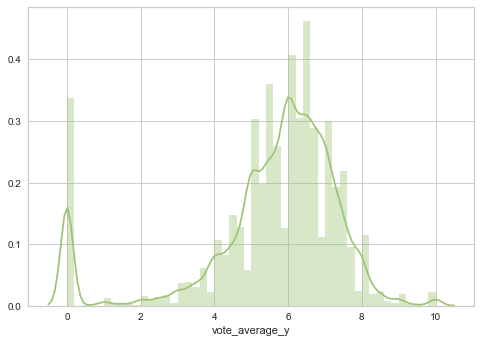

In [72]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'g')

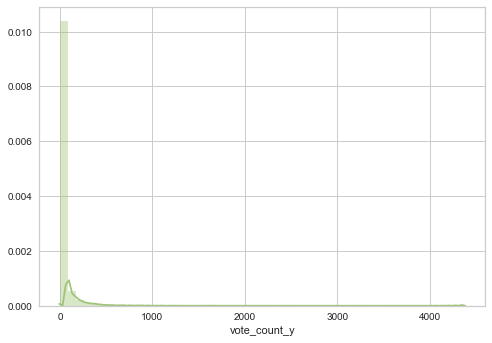

In [73]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'g')



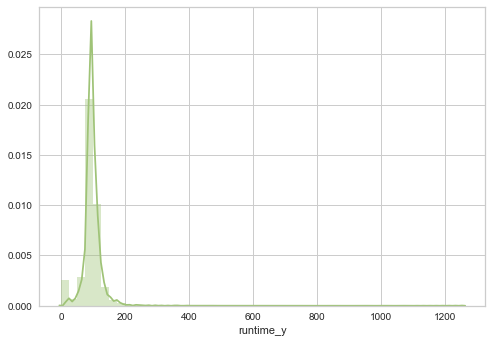

In [74]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'g')



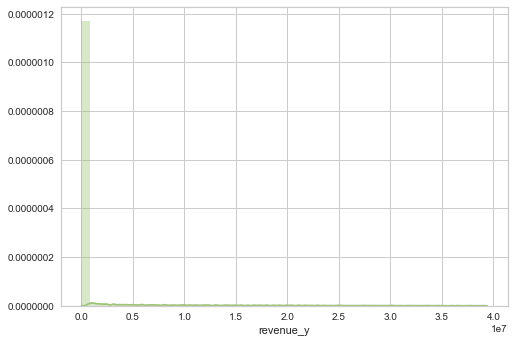

In [75]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'g')



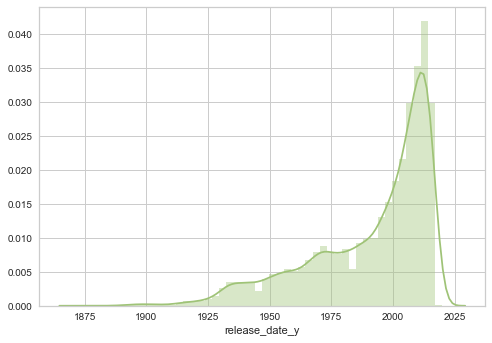

In [76]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'g')



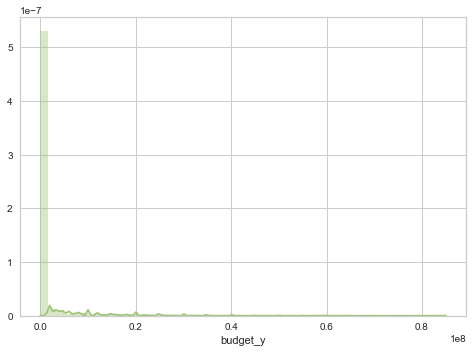

In [77]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'g')



### Cluster 1:

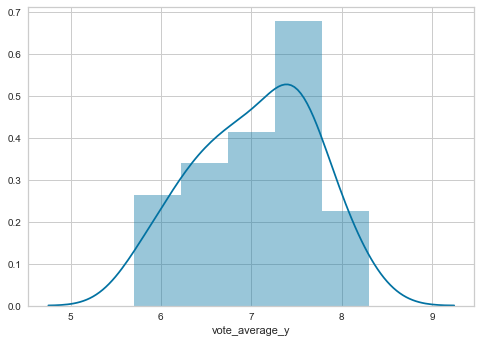

In [78]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')


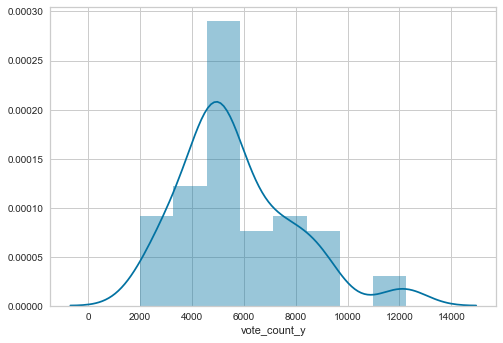

In [79]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'b')


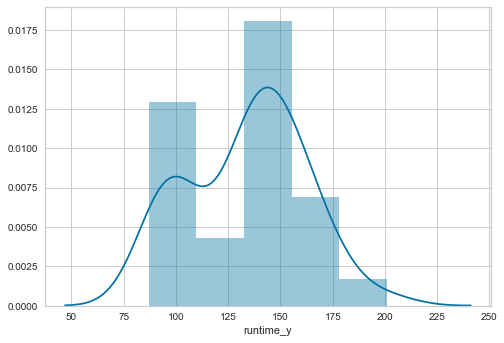

In [80]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'b')



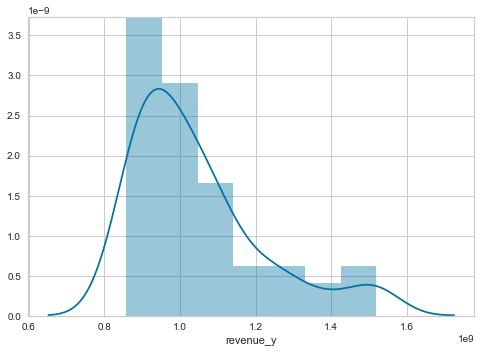

In [81]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'b')


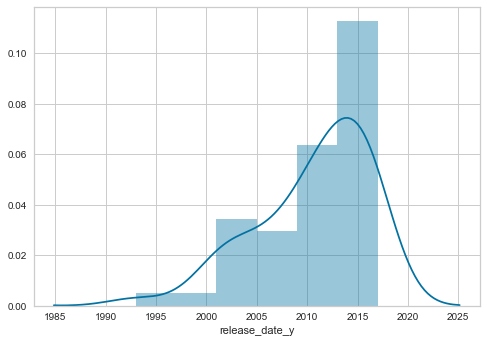

In [82]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'b')


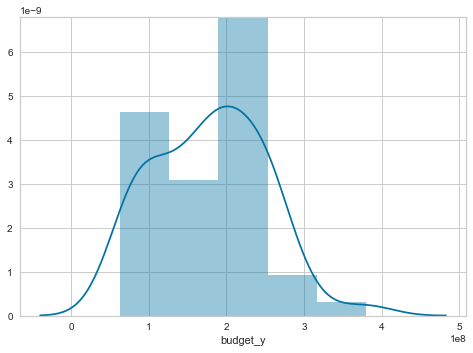

In [83]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'b')


### Cluster 2:

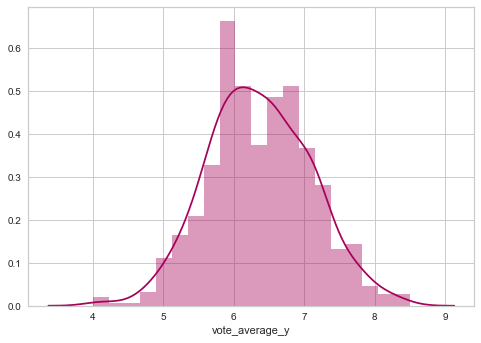

In [84]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'm')

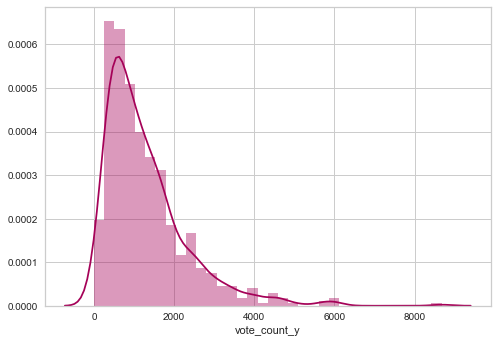

In [85]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'm')


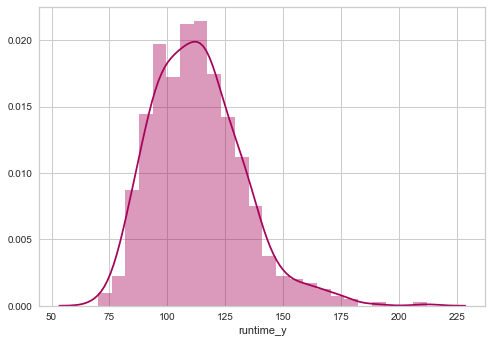

In [86]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'm')

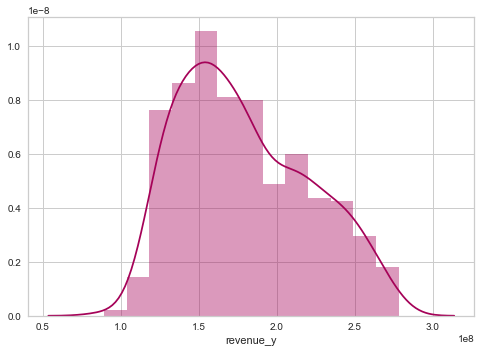

In [87]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'm')

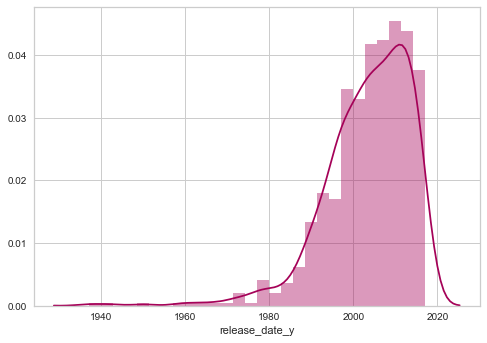

In [88]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'm')

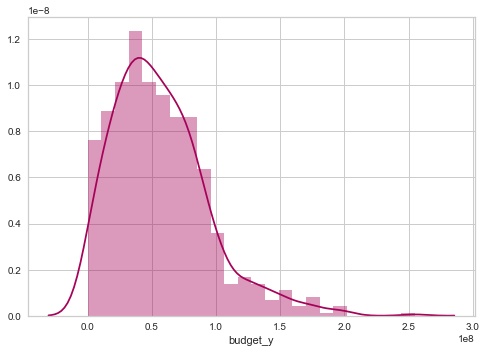

In [89]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'm')

### Cluster 3:


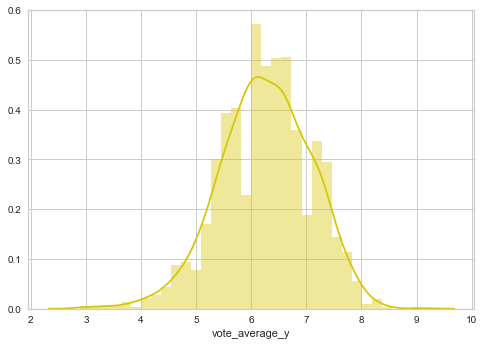

In [90]:

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'y')

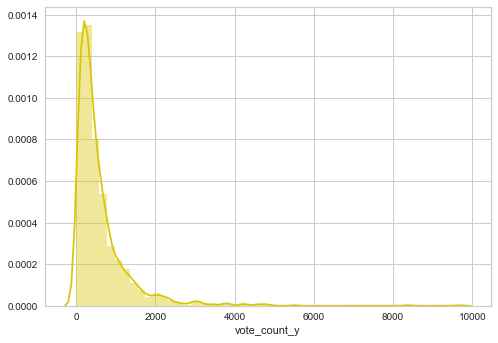

In [91]:

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'y')

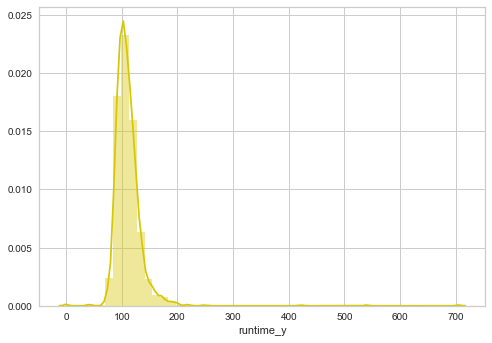

In [92]:
Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'y')

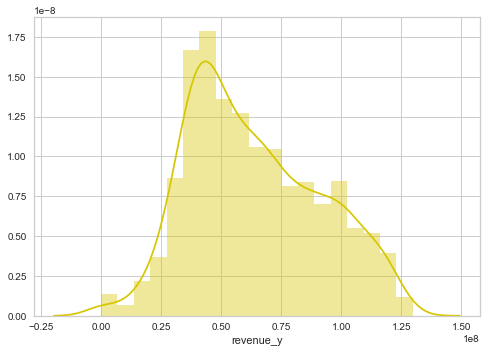

In [93]:
Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'y')

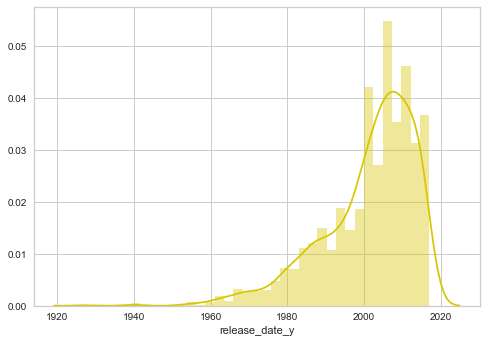

In [94]:
Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'y')

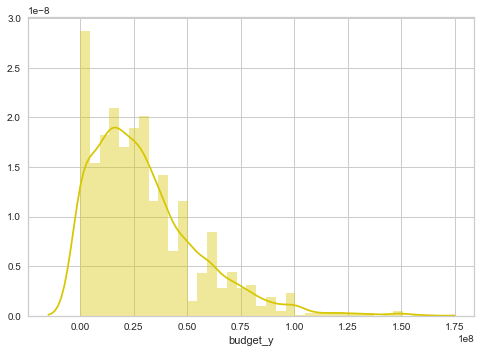

In [95]:
Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'y')

### Cluster 4

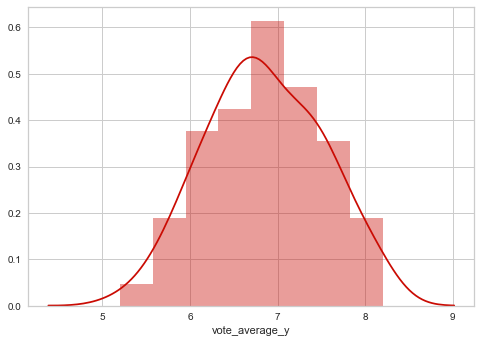

In [96]:
Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'r')

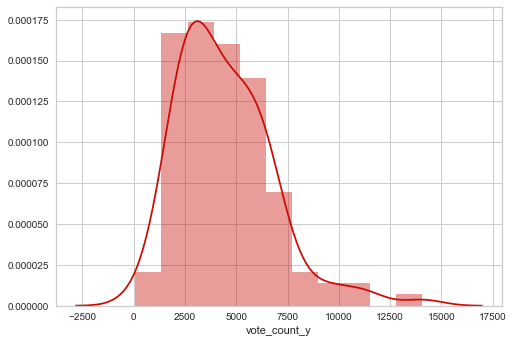

In [97]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'r')

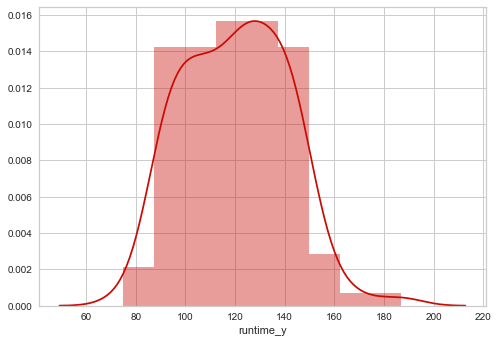

In [98]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'r')

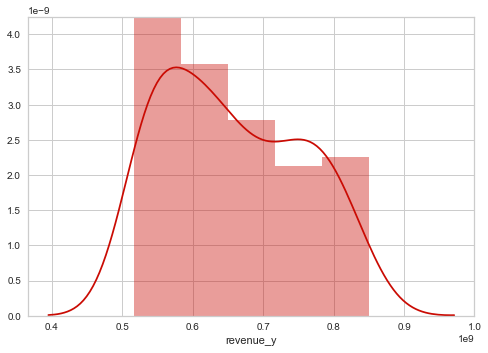

In [99]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'r')

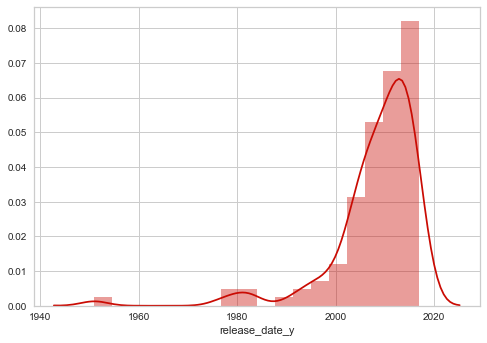

In [100]:
Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'r')

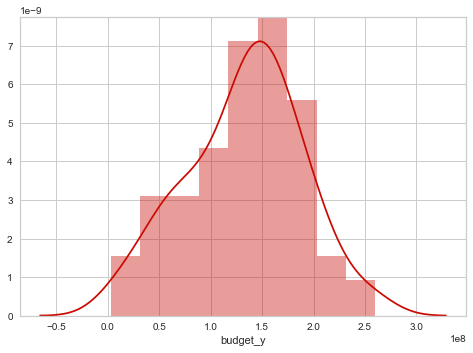

In [101]:
Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'r')

### Cluster 5:

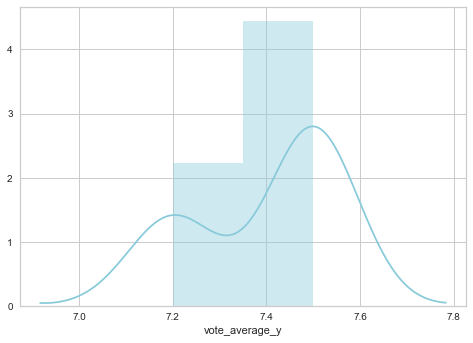

In [102]:

Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'c')

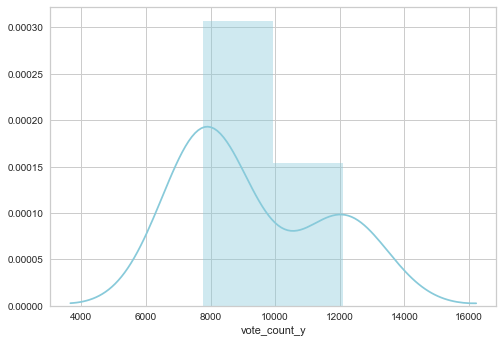

In [103]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'c')

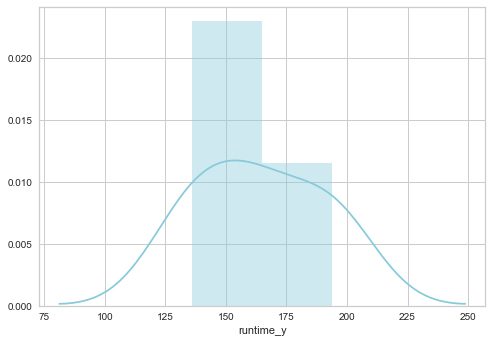

In [104]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'c')

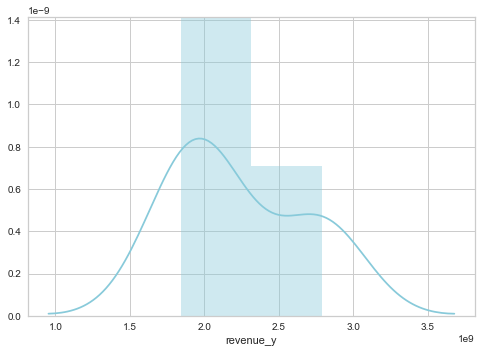

In [105]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'c')

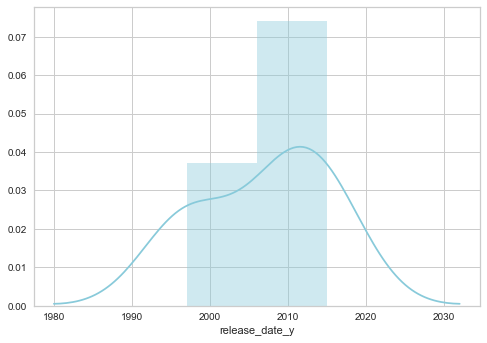

In [106]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'c')

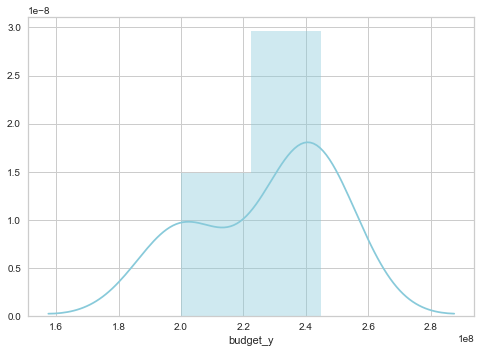

In [107]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'c')

### Cluster 6:

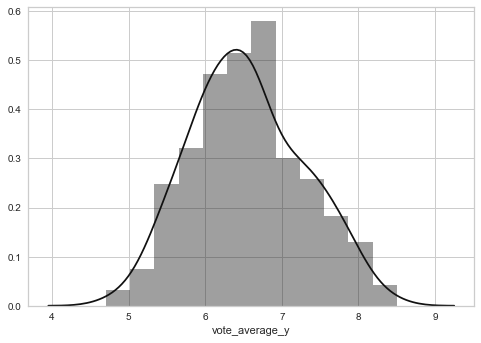

In [108]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'k')

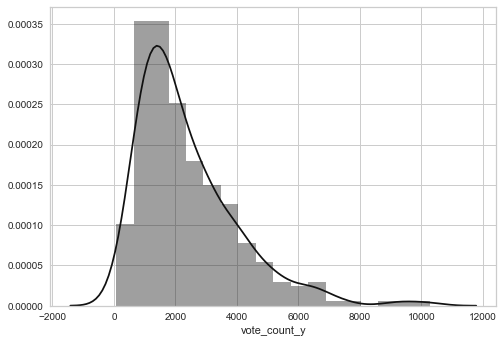

In [109]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'k')

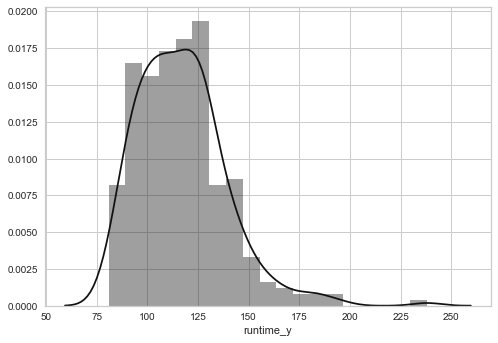

In [110]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'k')

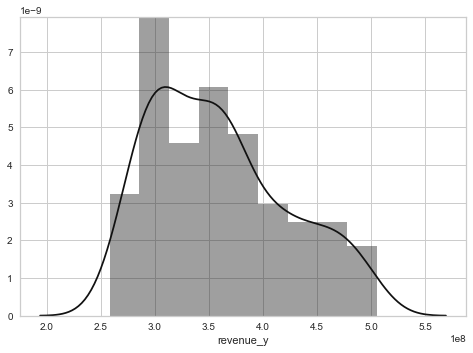

In [111]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'k')

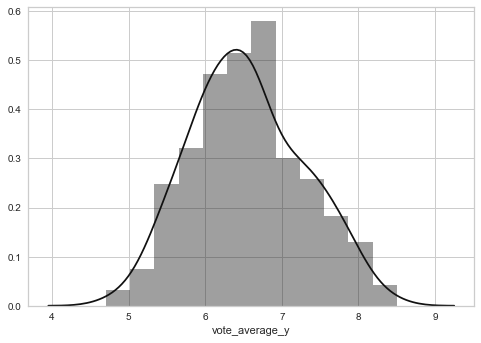

In [112]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'k')

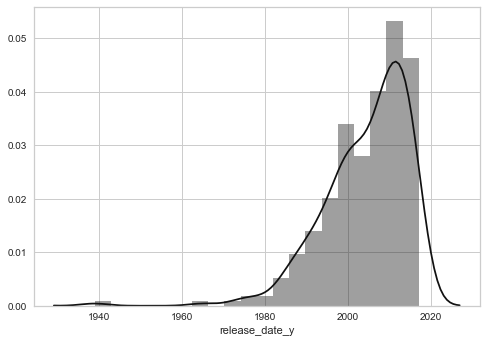

In [113]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'k')


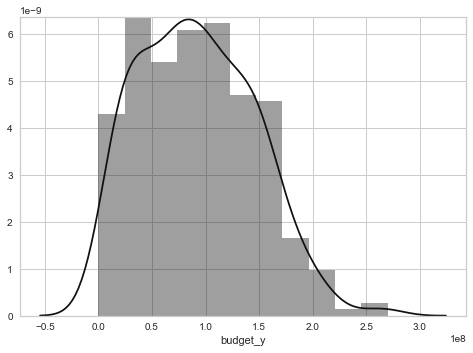

In [114]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'k')

### Another view of our cluster labels:


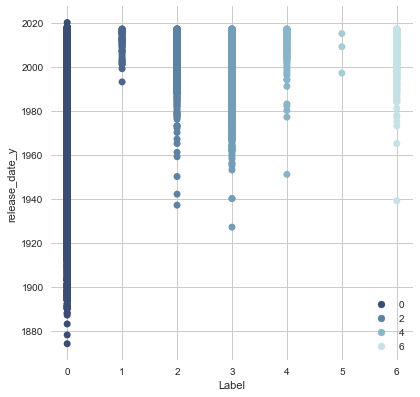

In [115]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['release_date_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)

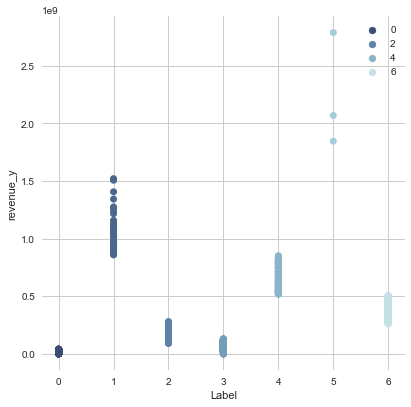

In [116]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['revenue_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)

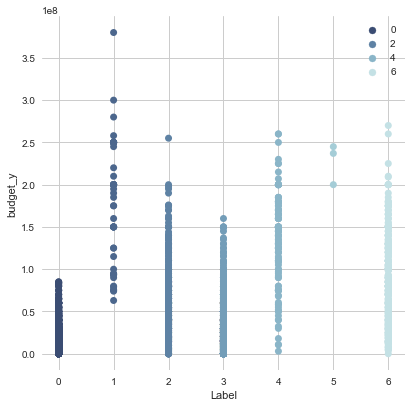

In [117]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['budget_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)



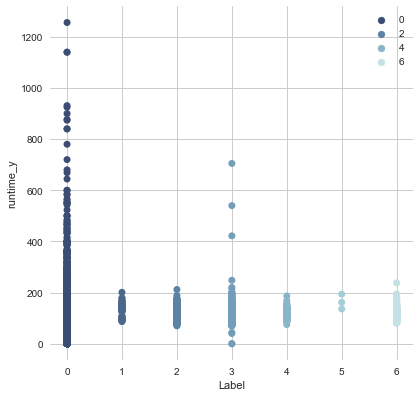

In [118]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['runtime_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)

 

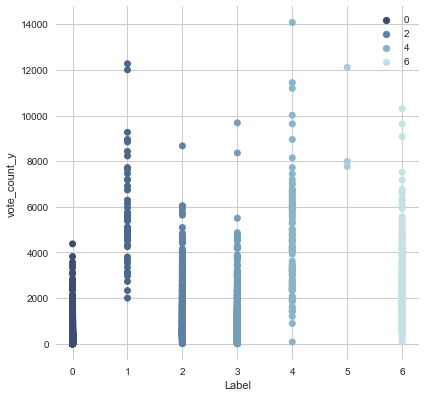

In [119]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['vote_count_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)


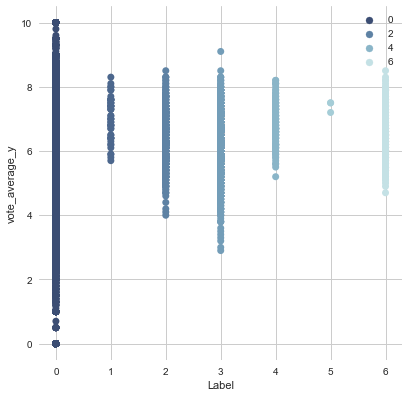

In [120]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['vote_average_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)


## Now let's look at our genres! We will take a look into each cluster to see how the population voted for that average and see if we see any emerging trends that we can include into our analysis.

### Let's start with Drama:

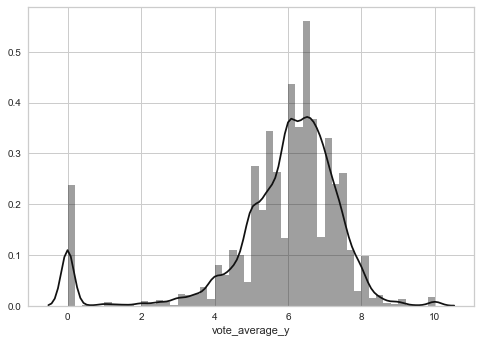

In [121]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

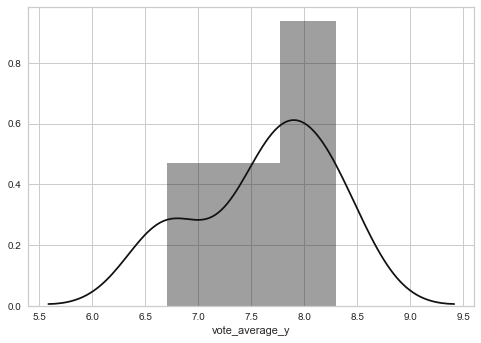

In [122]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

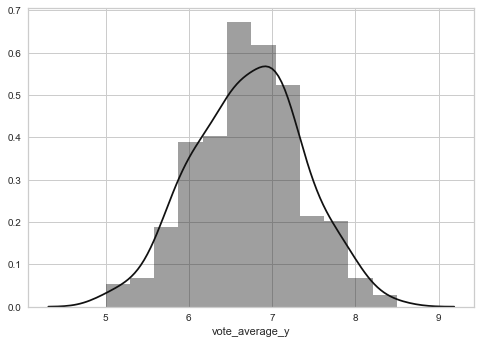

In [123]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

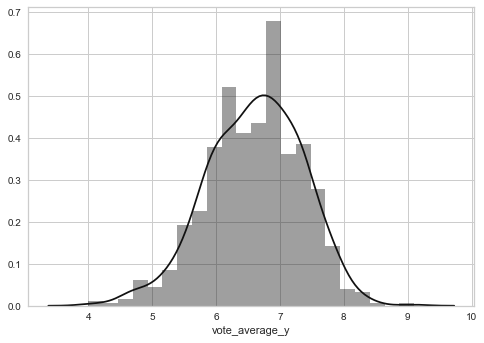

In [124]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

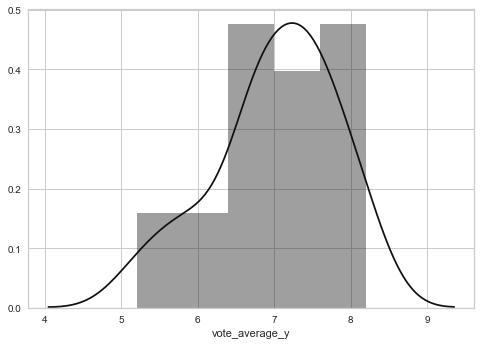

In [125]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


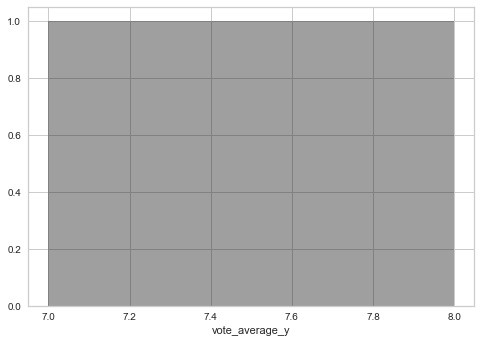

In [126]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

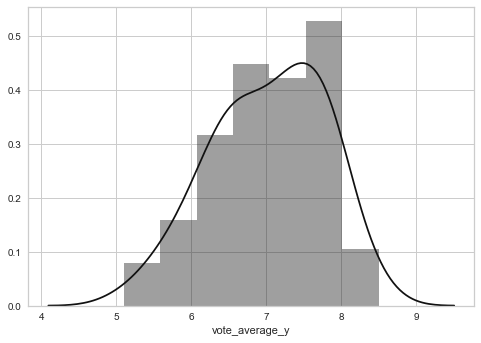

In [127]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

### Horror:

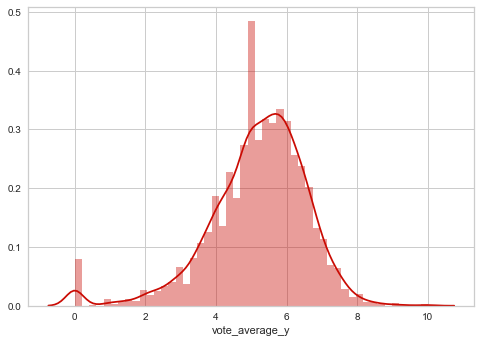

In [128]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


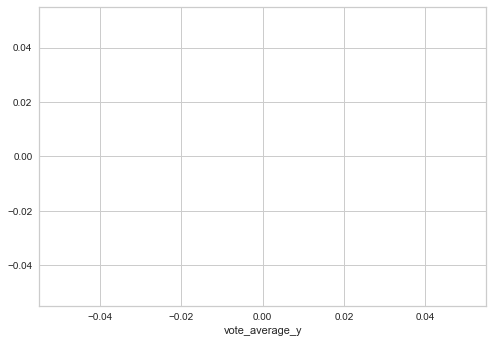

In [129]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

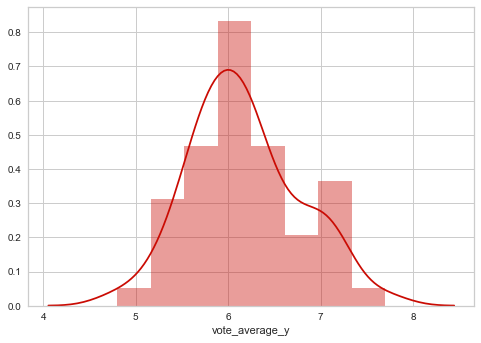

In [130]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

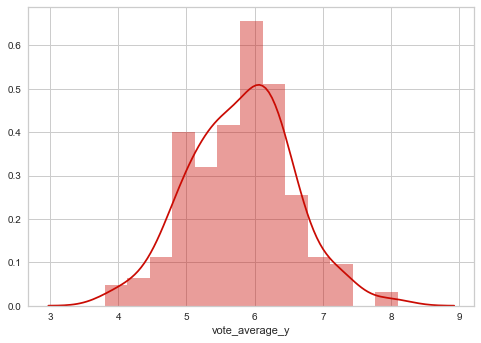

In [131]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

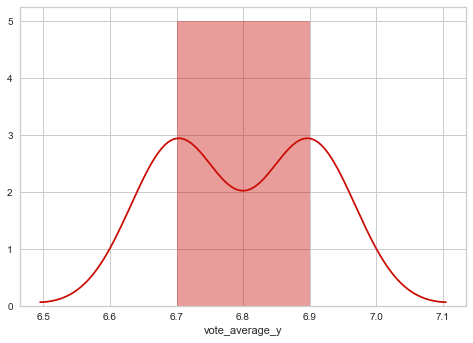

In [132]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

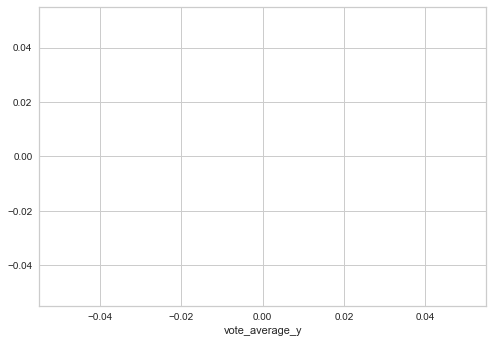

In [133]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

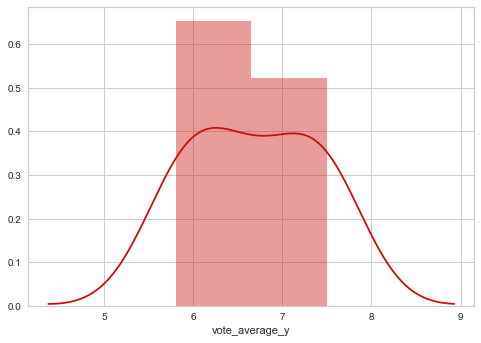

In [134]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

### Comedy:

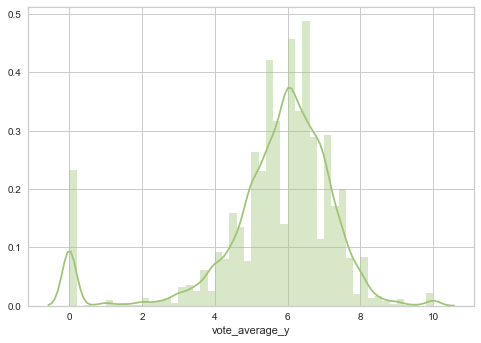

In [135]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

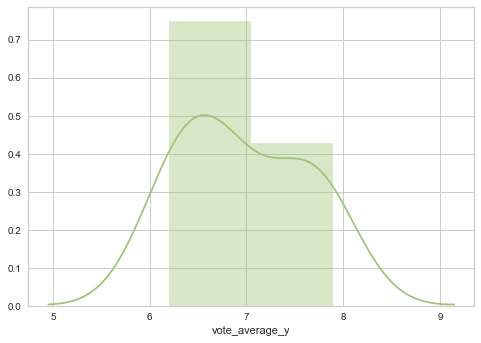

In [136]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

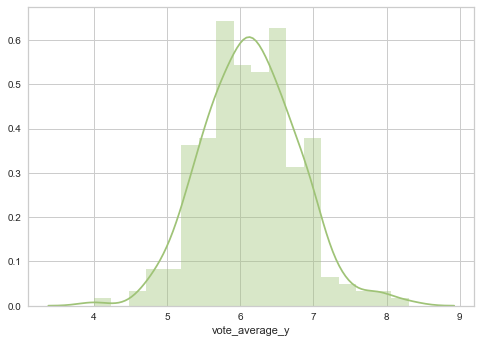

In [137]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

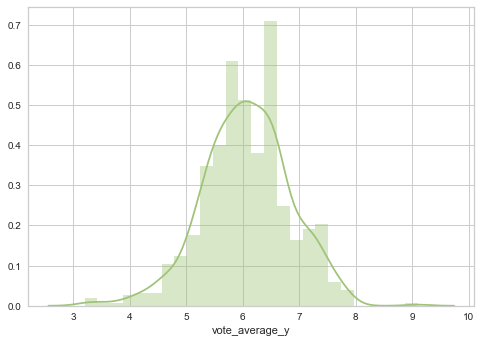

In [138]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

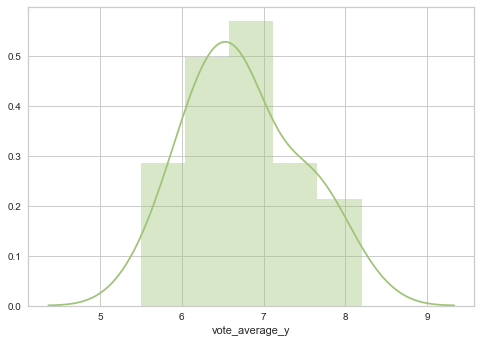

In [139]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

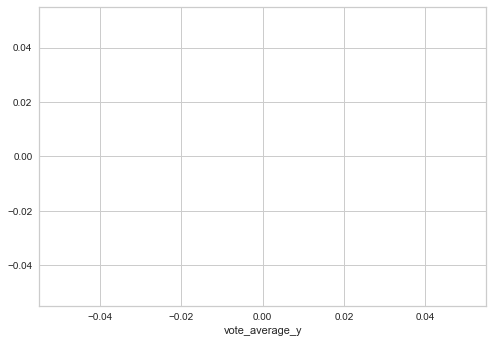

In [140]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

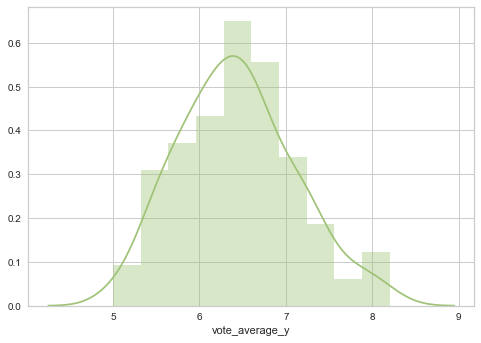

In [141]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

### Romance:

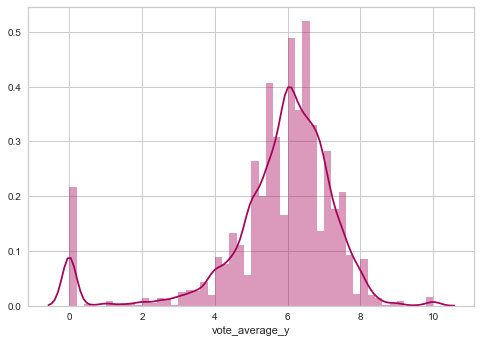

In [142]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

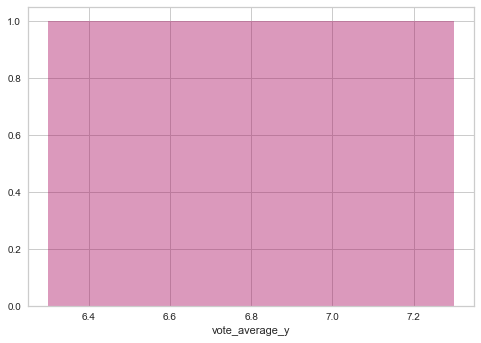

In [143]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

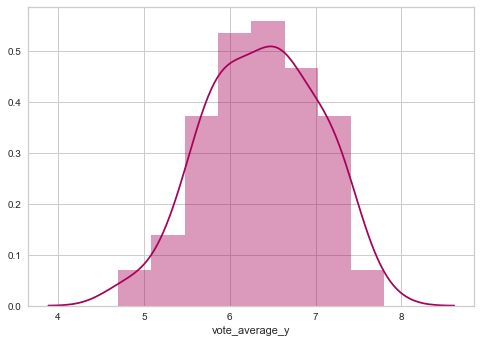

In [144]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

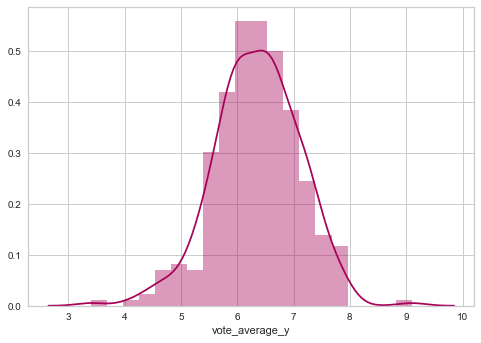

In [145]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

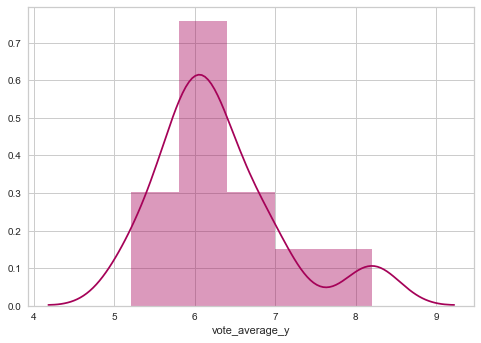

In [146]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

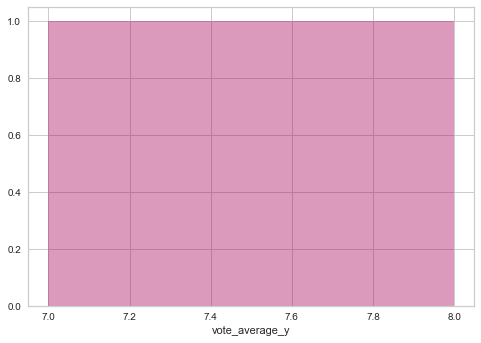

In [147]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

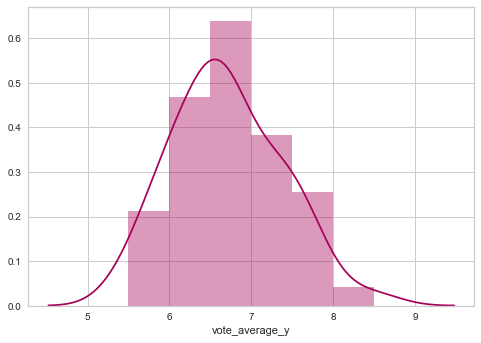

In [148]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

### Western:


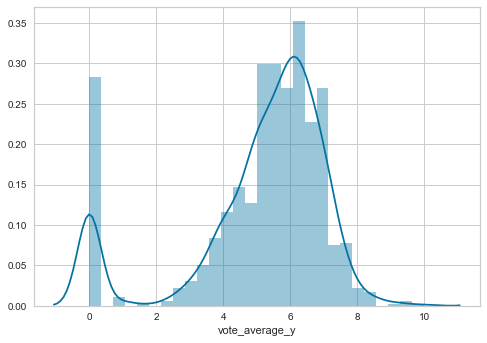

In [149]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

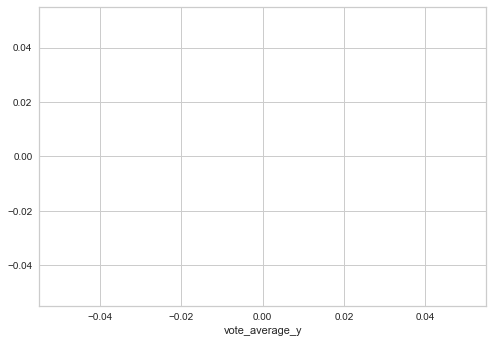

In [150]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

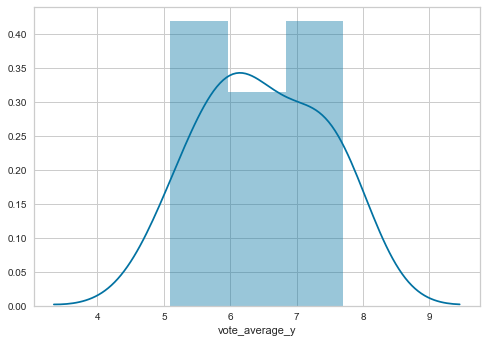

In [151]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

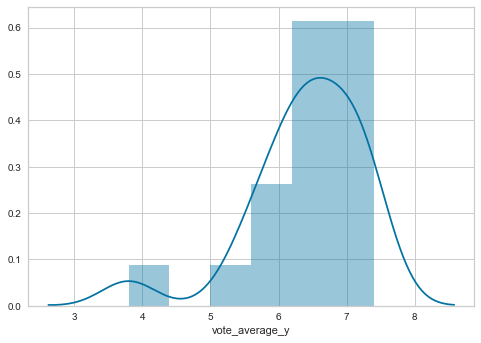

In [152]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

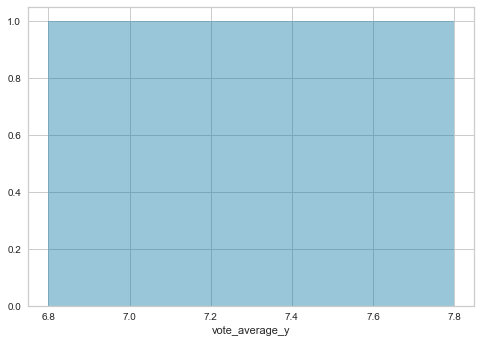

In [153]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

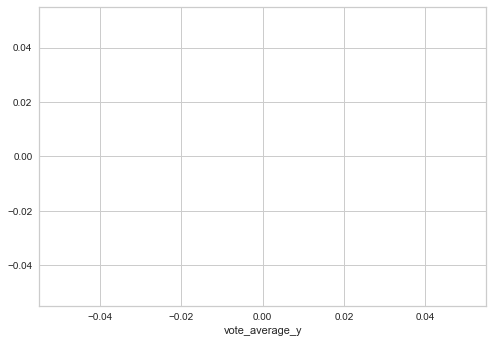

In [154]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

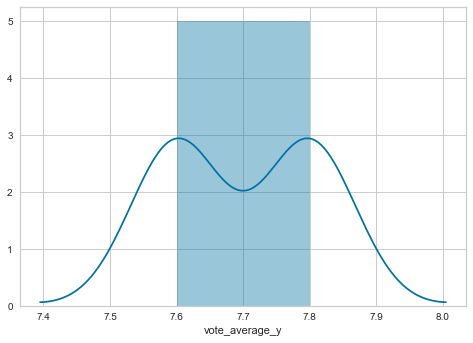

In [155]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

### Thriller:


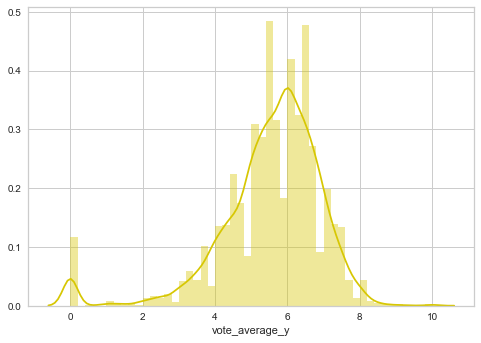

In [156]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

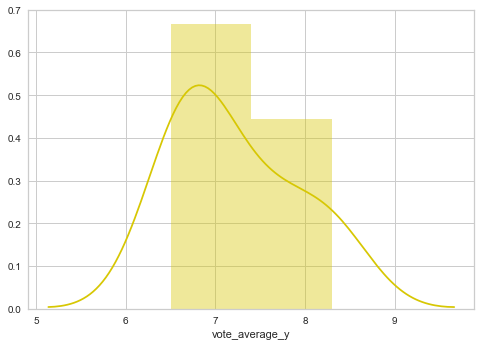

In [157]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

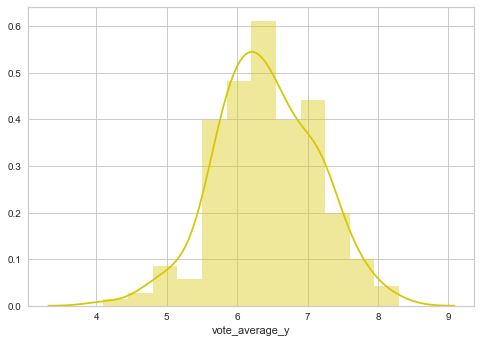

In [158]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

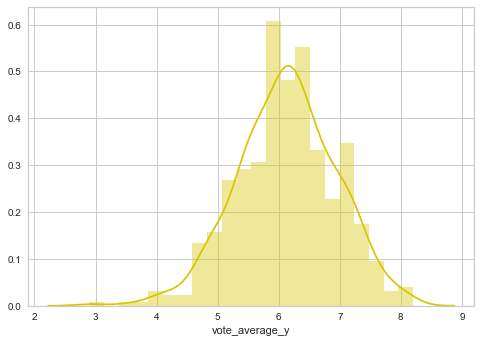

In [159]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

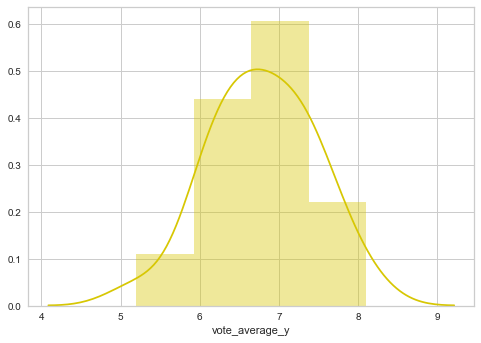

In [160]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

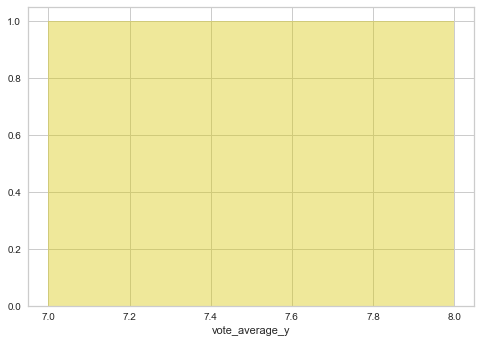

In [161]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

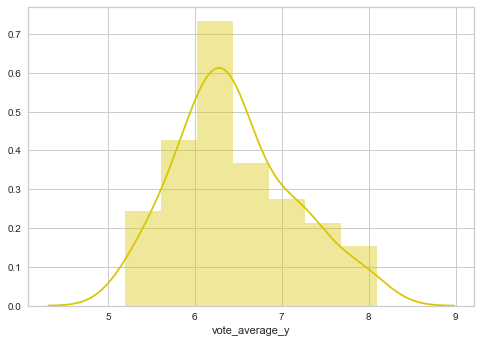

In [162]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

### Family:


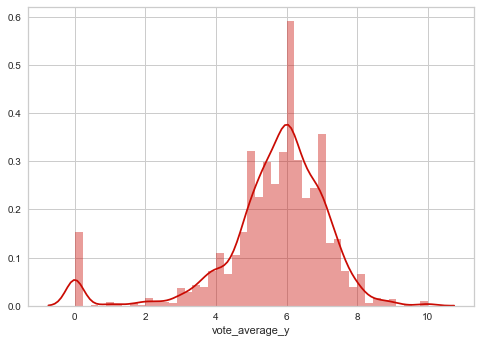

In [163]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

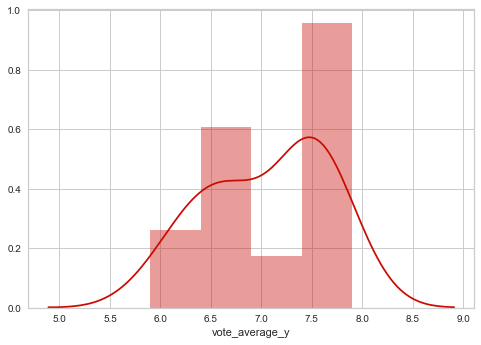

In [164]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

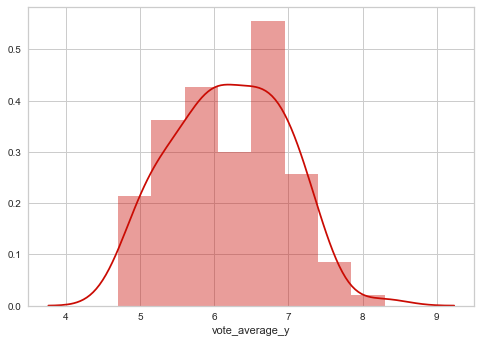

In [165]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

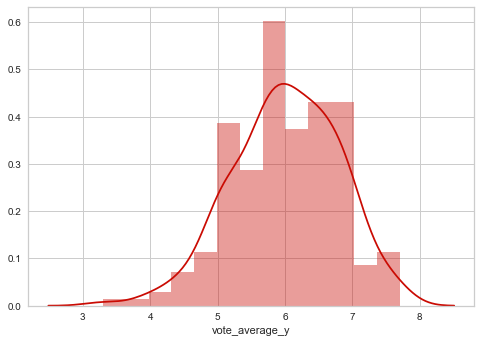

In [166]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

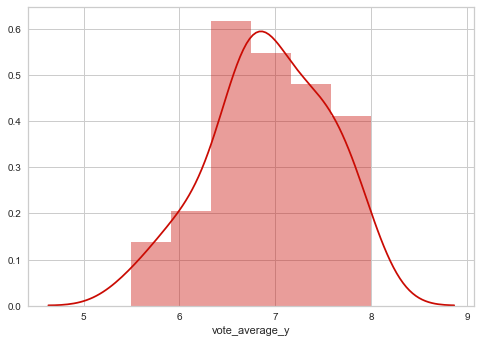

In [167]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

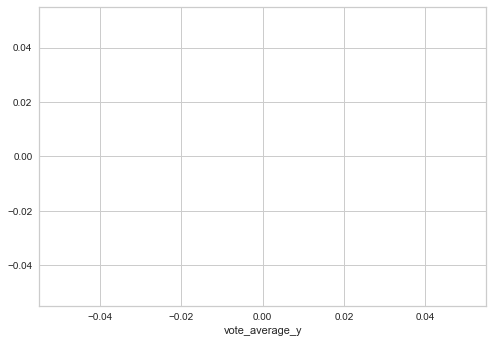

In [168]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

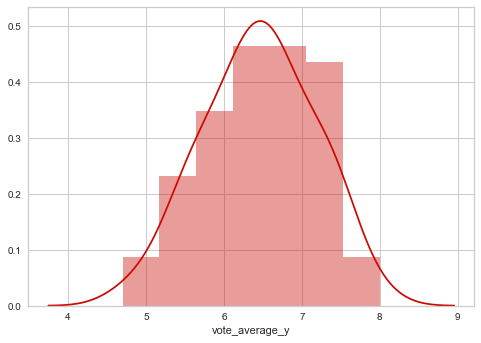

In [169]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

### Crime:


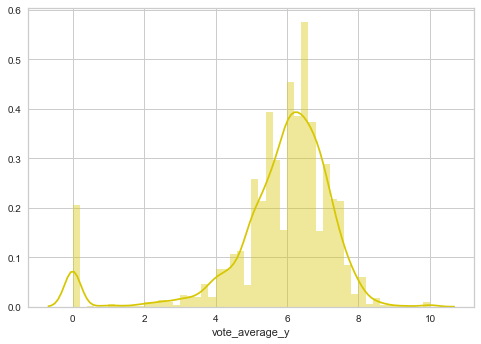

In [170]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

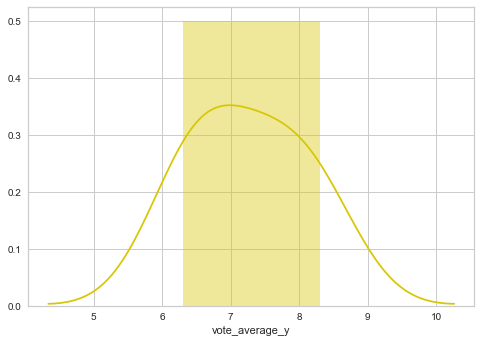

In [171]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

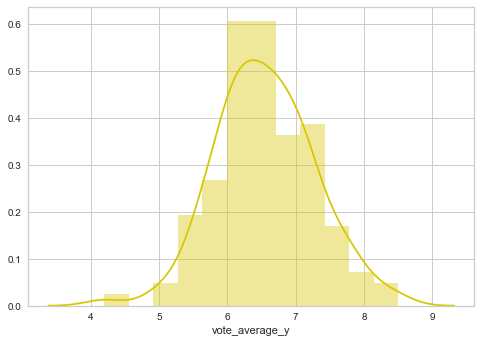

In [172]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

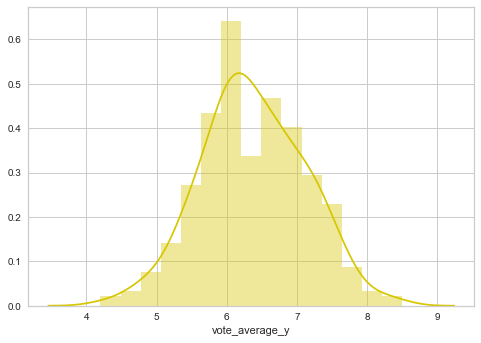

In [173]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

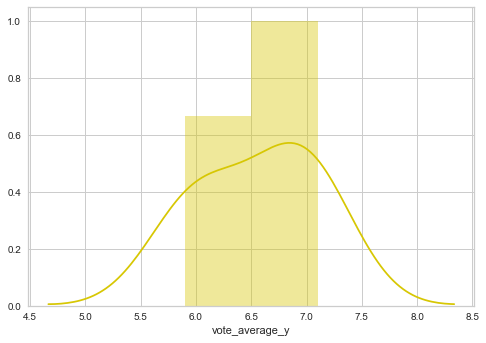

In [174]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

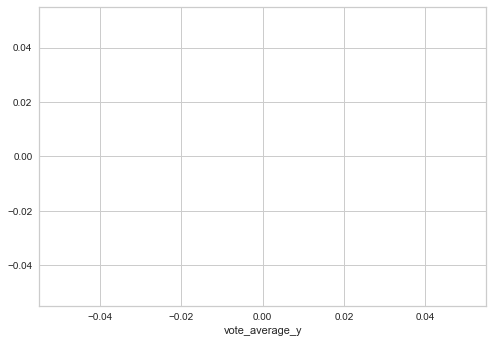

In [175]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

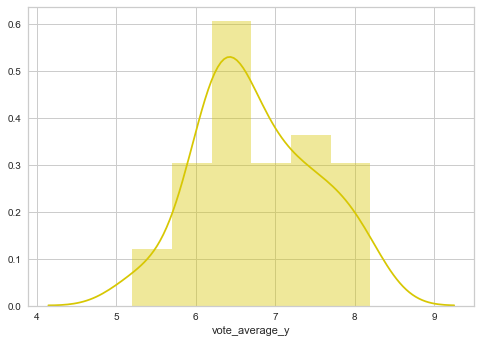

In [176]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

### Documentary:


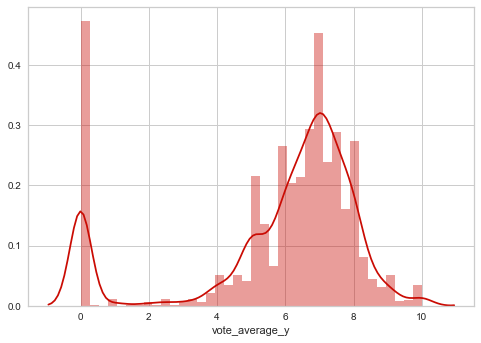

In [177]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

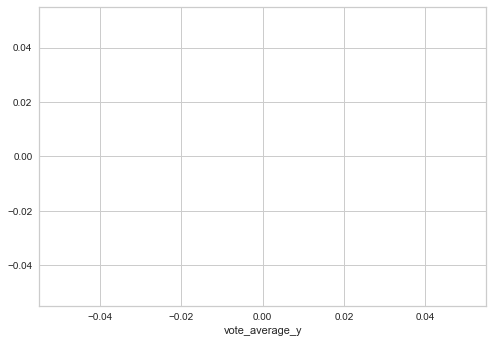

In [178]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

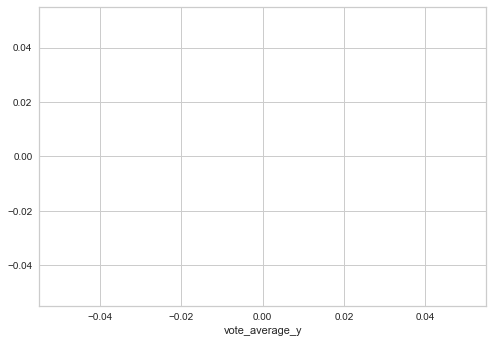

In [179]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

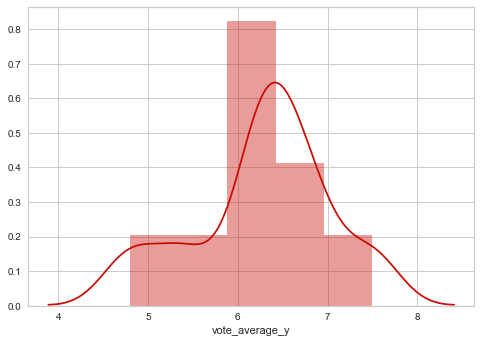

In [180]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

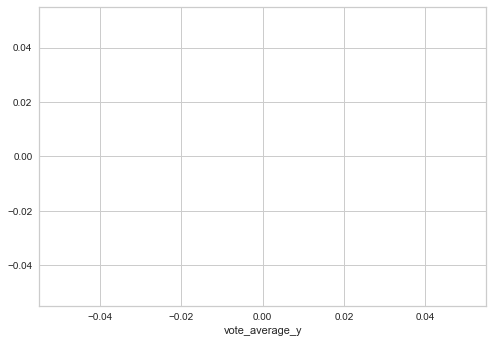

In [181]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

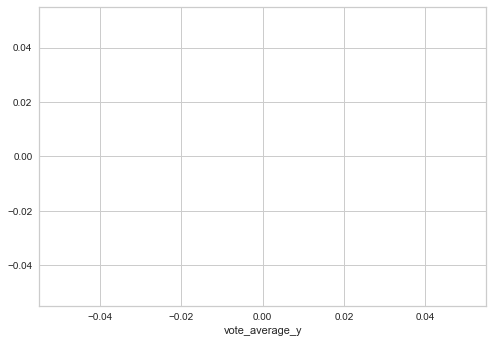

In [182]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

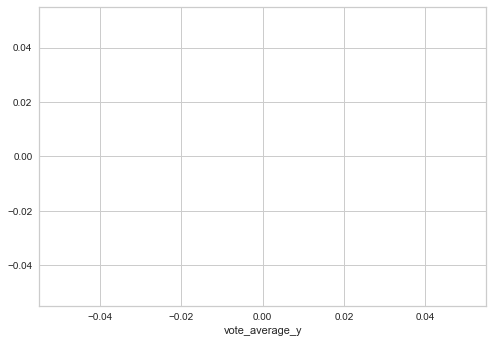

In [183]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

### Animation:


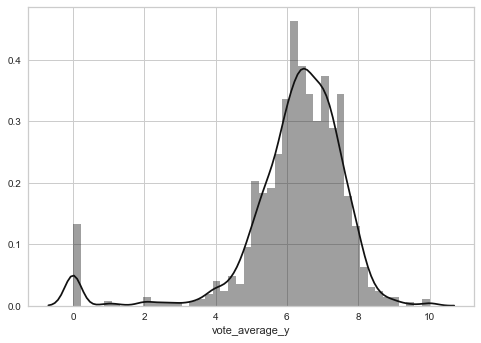

In [184]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

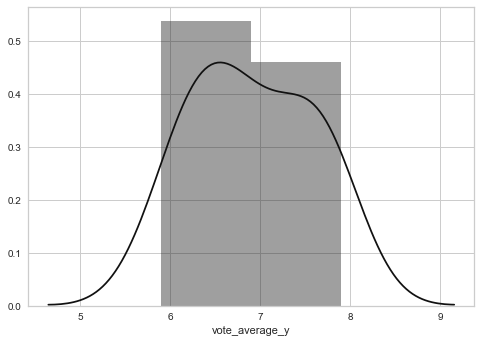

In [185]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

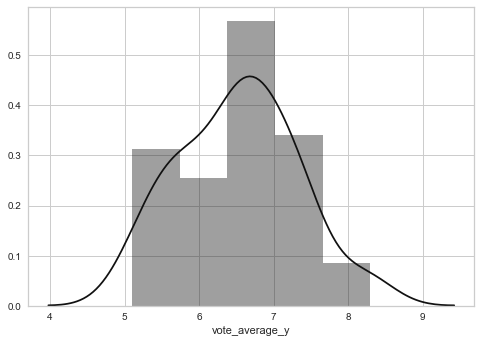

In [186]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

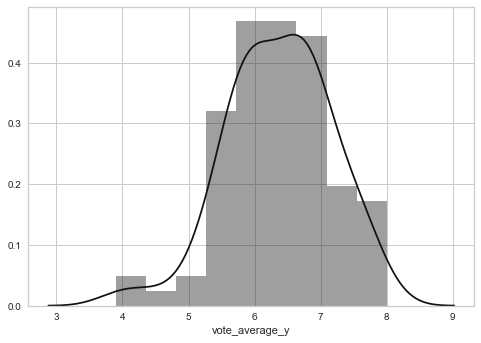

In [187]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

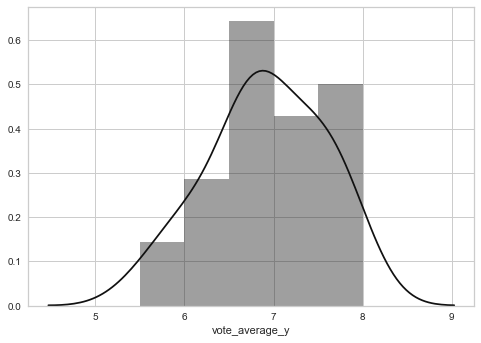

In [188]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

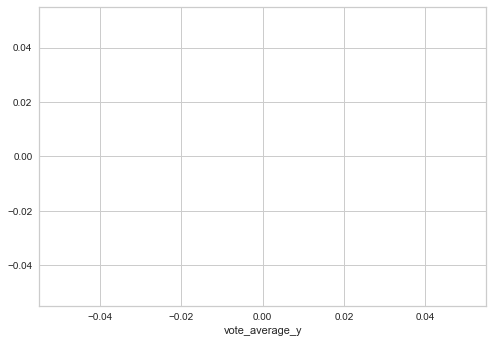

In [189]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

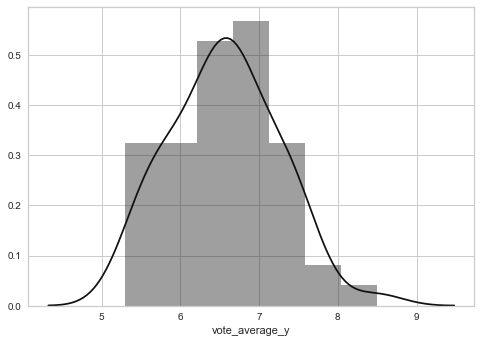

In [190]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

### Adventure:


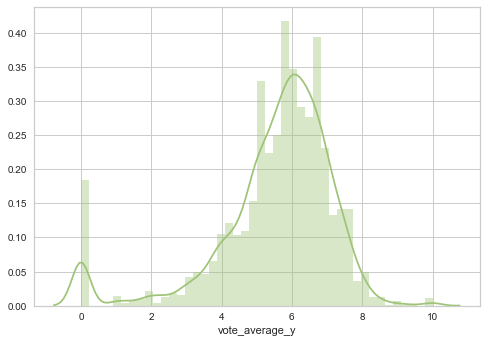

In [191]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

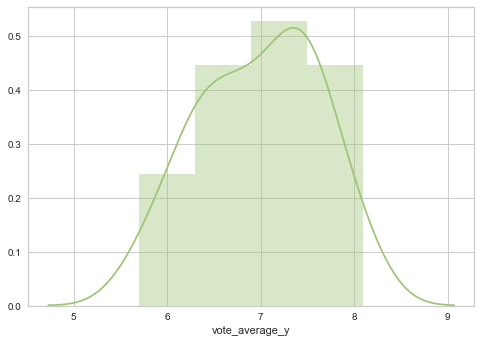

In [192]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

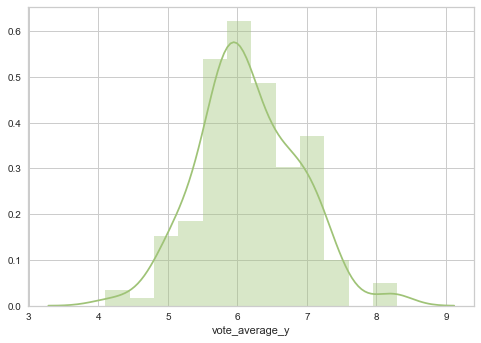

In [193]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

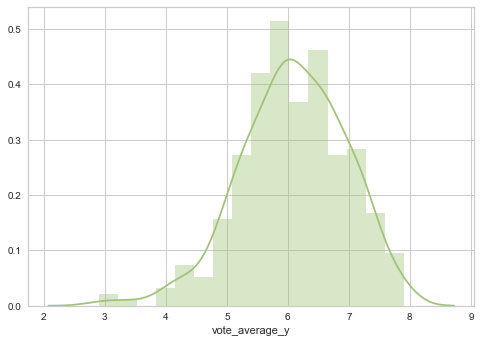

In [194]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

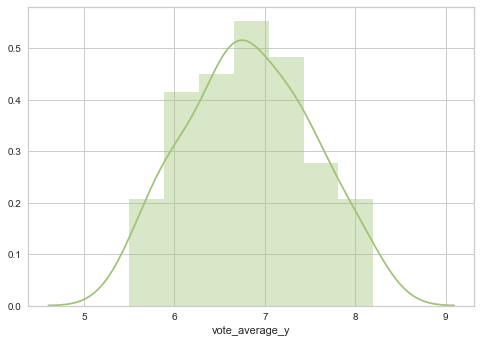

In [195]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

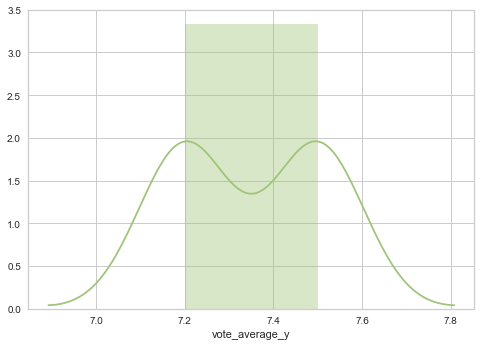

In [196]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

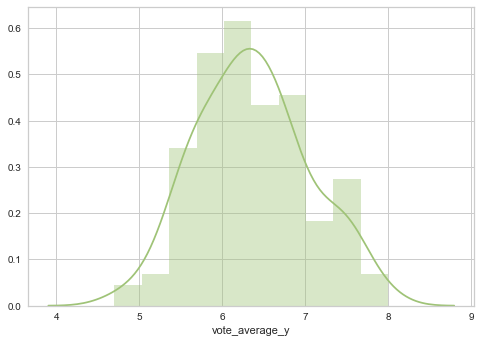

In [197]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

### Action:


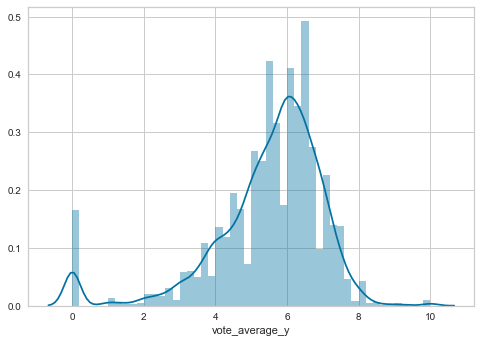

In [198]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

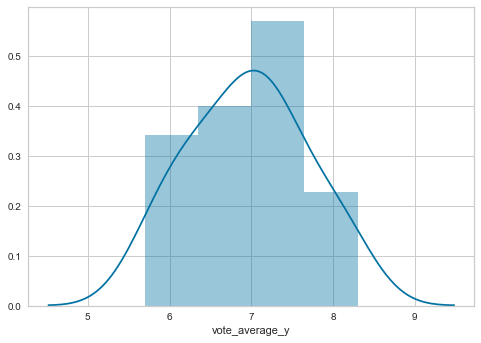

In [199]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

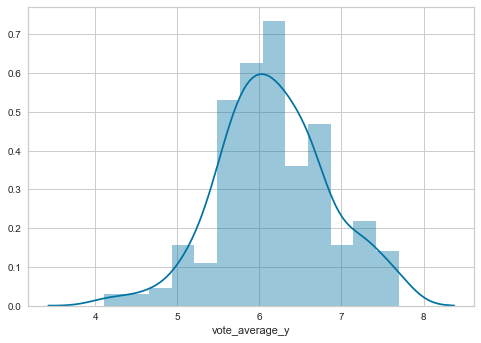

In [200]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

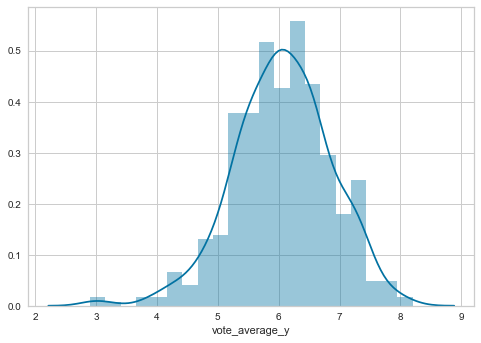

In [201]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

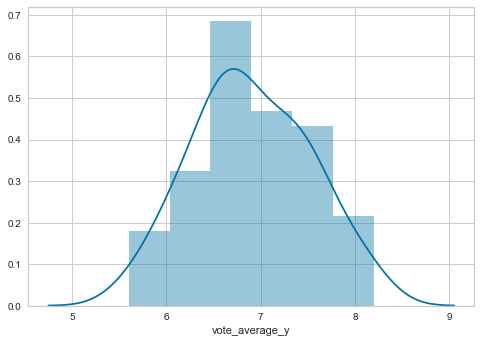

In [202]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

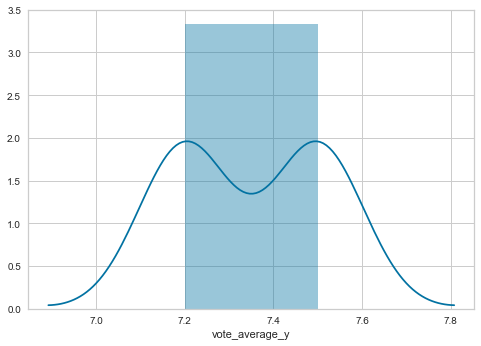

In [203]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

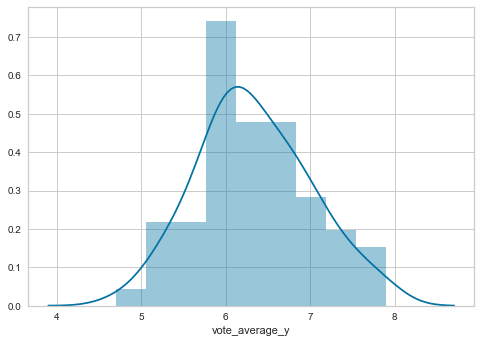

In [204]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

### Foreign:


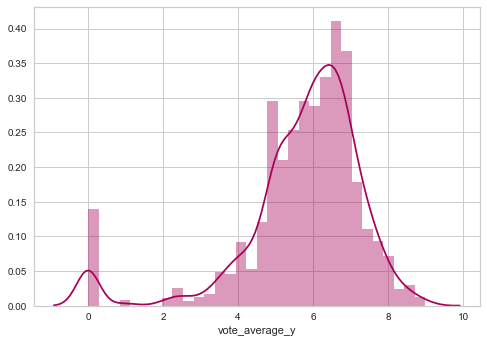

In [205]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

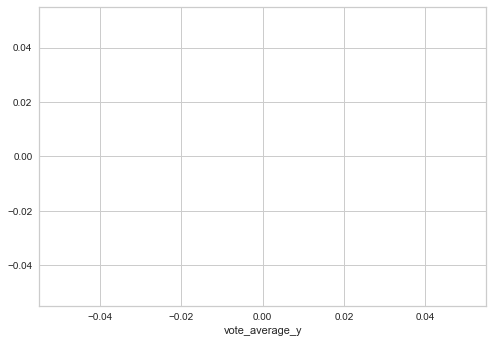

In [206]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

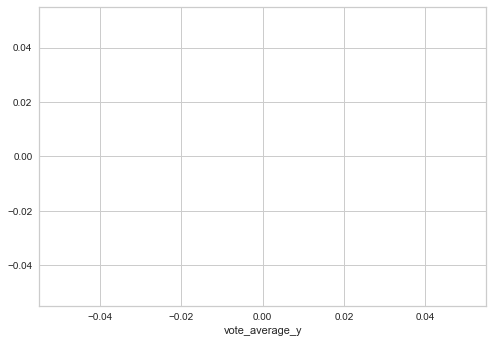

In [207]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

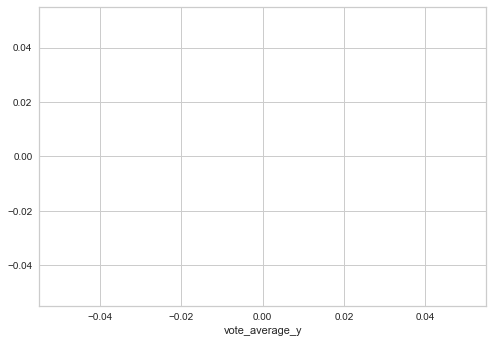

In [208]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

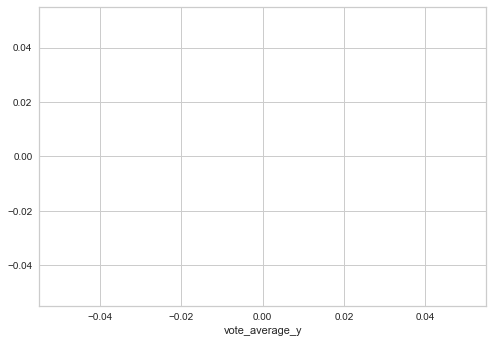

In [209]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

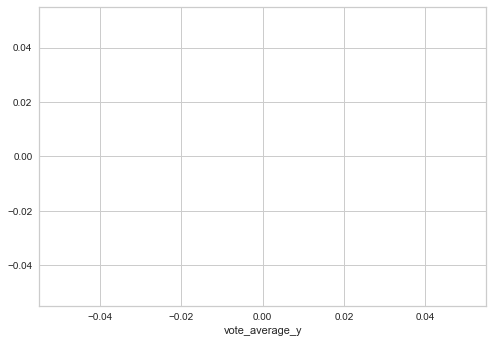

In [210]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

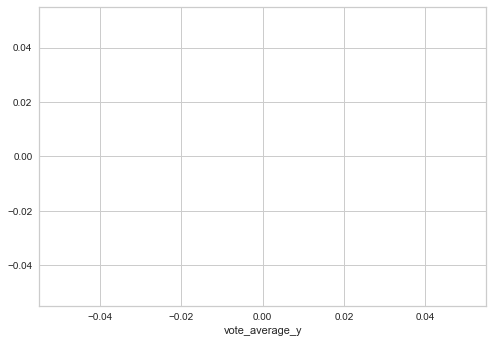

In [211]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

### Science Fiction:

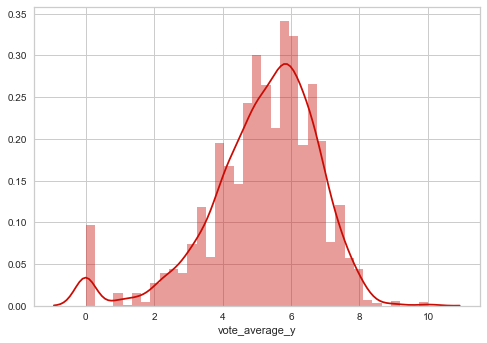

In [212]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

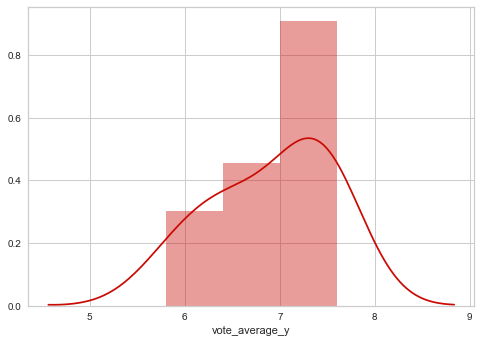

In [213]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

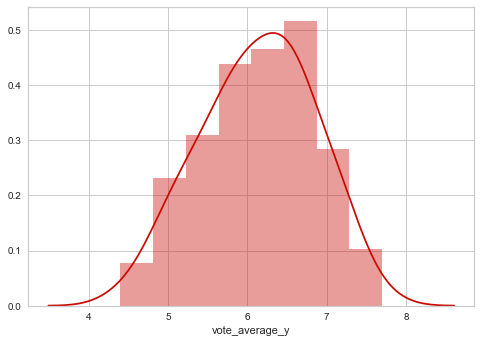

In [214]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

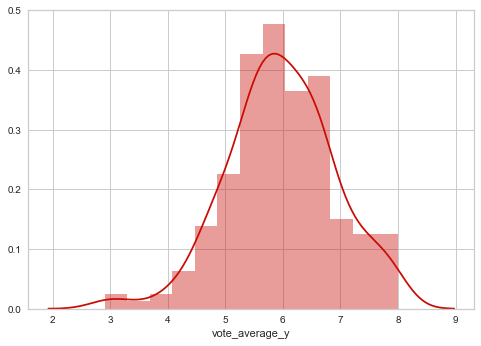

In [215]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

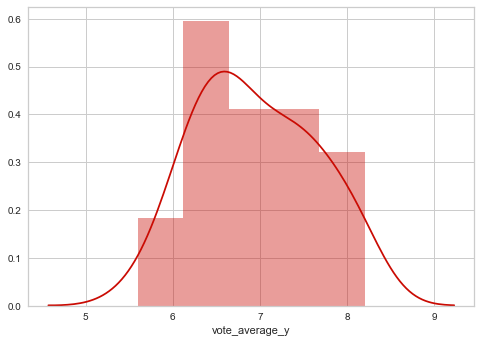

In [216]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

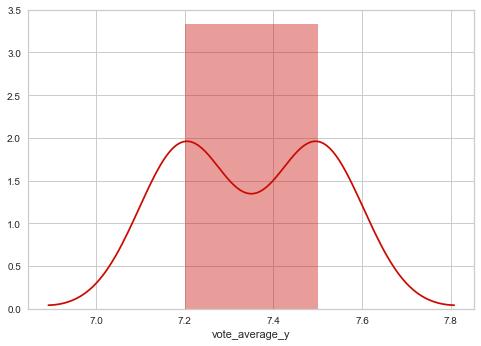

In [217]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

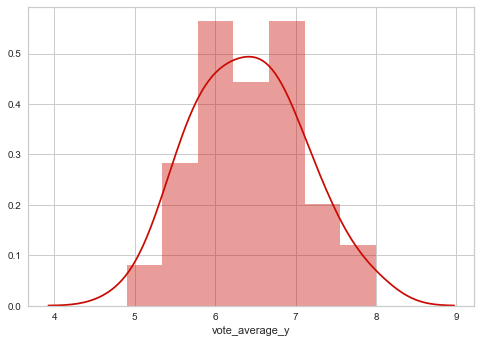

In [218]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

### Let's take another birds eye view of our genres and the relationship each cluster group has to each genre. 

### Romance

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


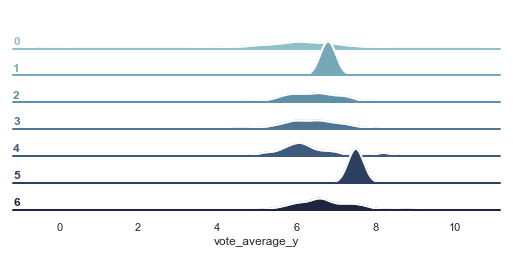

In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Romance'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

### Action

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


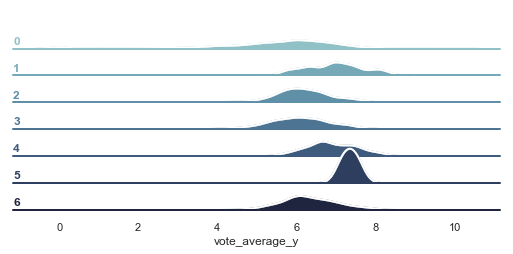

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Action'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

### Comedy

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


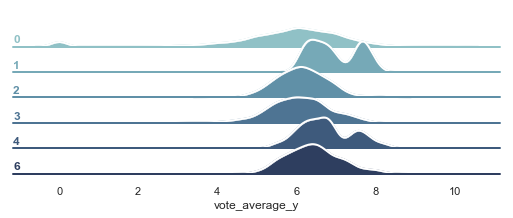

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Comedy'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

### Drama

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


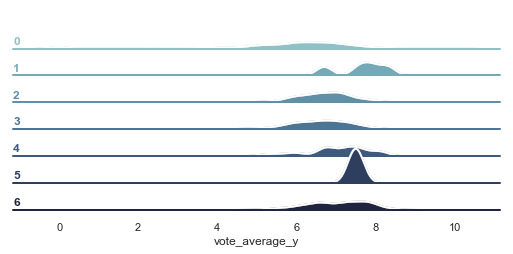

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Drama'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

### Horror

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


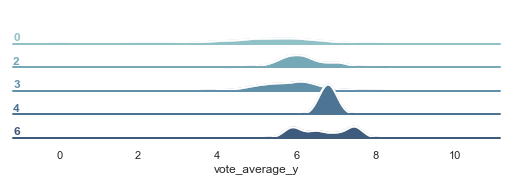

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Horror'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

### Family 

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


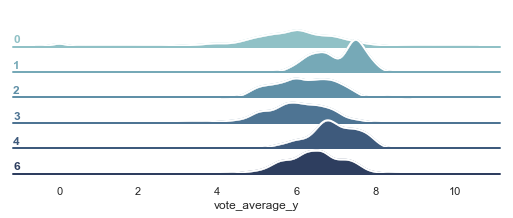

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Family'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

## A few of our findings from each cluster segment:

### Cluster 1: Low budget, fewest ratings, lowest grossing films
Genres Preferred:  Drama, Horror, Western, Romance, Comedy, Family, Action, Foreign

### Cluster 2: Recently released, high grossing films, generally well voted.  
Genres Preferred:  Drama, Romance, Comedy, Family, Action, Sci-Fi

### Cluster 3: Low budget/revenue, this cluster could include filmst that are generally not well known 
Genres Preferred:  Drama, Horror, Western, Romance, Comedy, Family, Action, Sci-Fi

### Cluster 4: Low budget/revenue, higher ratings, perhaps more art house vibes
Genres Preferred:  Drama, Horror, Western, Romance, Comedy, Family, Action 

### Cluster 5: Good ratings, mid Budget/Revenue, Classics 
Genres Preferred:  Drama, Horror, Western, Romance, Comedy, Action, Sci-Fi

### Cluster 6: New, glossy, high grossing films with a solid 7.5 rating - high votes  
Genres Preferred:  Drama, Romance, Action, Sci-Fi

### Cluster 7: Good ratings, modest revenue, low-mid high budget
Genres Preferred:  Drama, Horror, Western, Romance, Comedy, Family, Action, Sci-Fi

## So What’s Next?

### We can move onto a recommendation engine 
Ultimately pairing these clusters with user data would be beneficial here and it could be fairly simple to add this in so that we can help Netflix show more users that would resonate with one or more of these clusters

### Deeper dive into the clusters 
Some of the clusters seem rather like one another, so it would also be beneficial to bring in data from the other files related to this metadata to see if we can create more robust groupings of each cluster. What we know is helpful so far, but finding more robust “characters” of each cluster would be more helpful. 

    